# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: de Antón Santiago, Sara
*   Alumno 2: Sánchez La O, Benjamín C.
*   Alumno 3: Sánchez Díaz, Isaac José
*   Alumno 4: González Pavía, Vicente José






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [ ]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [ ]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

Archivos en el directorio: 
['.Backup_venv_tf253', '.git', '.gitignore', '.idea', '.ipynb_checkpoints', '.venv_tf253', 'best_episode.mp4', 'BSL_PER_proyecto.ipynb', 'BSL_PER_proyecto.py', 'BSL_proyecto.ipynb', 'graph.py', 'ISAAC', 'models', 'proyecto.ipynb', 'README.txt', 'SDAS_proyecto.ipynb', 'showMetrics.ipynb', 'showTrainingGraphs.ipynb', 'testAgent.py', 'upload_weights.ipynb', 'weights']


---
### 1.4. Instalar librerías necesarias

In [ ]:
# NO EJECUTAR EN SAGEMAKER (MIRAR EL README PARA CONFIGURAR EL ENTORNO)
# AUNQUE DE FALLOS DE INSTALACIÓN LOS IMPORTS FUNCIONAN
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12  #2.8
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/Kojoley/atari-py.git to c:\users\benjamincarmelo.sanc\appdata\local\temp\pip-req-build-xraa0qs_
  Resolved https://github.com/Kojoley/atari-py.git to commit 86a1e05c0a95e9e6233c3a413521fdb34ca8a089
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/Kojoley/atari-py.git 'C:\Users\benjamincarmelo.sanc\AppData\Local\Temp\pip-req-build-xraa0qs_'


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [ ]:
# Añadidas y compatible con las versiones anteriores
if not IN_COLAB:
  %pip install pandas==1.1.3
  %pip install "matplotlib>=3.1,<3.4"
  %pip install scipy==1.5.2
  %pip install seaborn==0.11.1


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

In [ ]:
# DEFINIR AL PRINCIPIO
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

#### Importar librerías

Hemos añadido algunas librerías orientadas a la definción específica de capas neuronales y a la implementación de funciones personalizadas mediante Callbacks. Además, la librería `json` nos ha resultado útil para guardar los hiperparámetros de los mejores modelos. Por último, se han incorporado herramientas de visualización gráfica y estadística para analizar los resultados de forma más clara y detallada.

In [ ]:
from __future__ import division

from PIL import Image
import numpy as np
import gym
import os
import glob

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute, Input
from tensorflow.keras.optimizers import Adam, schedules
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory, Memory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# AÑADIDO
from tensorflow.keras.layers import Lambda, BatchNormalization
from tensorflow.keras.callbacks import Callback
import json
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pickle
import seaborn as sns
from collections import namedtuple, deque

#### Configuración base

In [ ]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [ ]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [ ]:
# ROOT PATH PARA LOS MODELOS Y SUS PESOS
if IN_COLAB:
  mount='/content/gdrive'
  drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"
  MODELS_DIR=drive_root+"/models"
else:
  MODELS_DIR="./models"

def get_dirs(model_name="modelo1"):
    WEIGHTS_DIR = os.path.join(MODELS_DIR, model_name, "weights")
    CHECKPOINTS_DIR = os.path.join(MODELS_DIR, model_name, "checkpoints")
    MODEL_DIR = os.path.join(MODELS_DIR, model_name)
    os.makedirs(WEIGHTS_DIR, exist_ok=True)
    os.makedirs(CHECKPOINTS_DIR, exist_ok=True)
    return MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR

def save_hyperparams(modelo):
    hyper_file = os.path.join(MODELS_DIR, modelo, modelo + '.json')
    with open(hyper_file, 'w') as f:
        json.dump(hiperparametros, f, indent=4)
    print(f"[INFO] Hiperparámetros guardados en {hyper_file}")


def load_hyperparams(modelo):
    hyper_file = os.path.join(MODELS_DIR, modelo, modelo + '.json')

    os.makedirs(os.path.dirname(hyper_file), exist_ok=True)

	# HIPERPARÁMETROS POR DEFECTO
    hiperparametros = {
        "MEMORY_SIZE": 1000000,
        "WARMUP_STEPS": 50000,
        "SCHEDULER_STEPS": 1000000,
        "GAMMA": 0.99,
        "MODEL_UPDATE": 10000,
        "LEARNING_RATE": 0.00025,
        "MODEL_CHECKPOINT_STEPS": 25000,
        "TRAIN_STEPS": 1750000,
        "LOG_INTERVAL": 10000,
        "DELTA_CLIP": 1.0
    }

    if not os.path.exists(hyper_file):
        with open(hyper_file, 'w') as f:
            json.dump(hiperparametros, f, indent=4)

        print(f"[INFO] Fichero de hiperparámetros no encontrado. Creado por defecto en: {hyper_file}")
        params = hiperparametros
    else:
        with open(hyper_file, 'r') as f:
            params = json.load(f)

    for key, value in params.items():
        globals()[key] = value
        hiperparametros[key] = value

    print(f"[INFO] Hiperparámetros cargados desde {hyper_file}")


La función de a continuación tiene como objetivo visualizar la evolución del entrenamiento de los modelos, a partir de archivos `CSV`, que contiene información por episodio (recompensas y número de pasos). Primero se cargan y limpian los datos, y se corrigen posibles reseteos en la numeración de pasos, algo que puede ocurrir si el entrenamiento se interrumpe o se reinicia. Luego, se calcula una secuencia de pasos acumulados coherente para representar correctamente el progreso del entrenamiento.

In [ ]:
# FUNCIÓN PARA PLOTEAR LOGS DEL TRAINING *** SARA ***
def graph_training_csv(csv_path, model_dir, model_name, save_clean_csv=False):
    if not os.path.isfile(csv_path):
        print(f"[ERROR] El archivo '{csv_path}' no existe.")
        return

    try:
        df = pd.read_csv(csv_path, usecols=[0, 1, 2])  # Usa encabezados del archivo
        df.columns = ['episode_jump', 'episode_reward', 'nb_steps']
    except Exception as e:
        print(f"[ERROR] No se pudo leer el CSV: {e}")
        return

    # Ignorar la primera fila de datos (por ejemplo, episodio 1)
    df = df.iloc[1:].reset_index(drop=True)

    # Convertir nb_steps a entero seguro
    df['nb_steps'] = pd.to_numeric(df['nb_steps'], errors='coerce')
    df = df.dropna(subset=['nb_steps'])
    df['nb_steps'] = df['nb_steps'].astype(int)

    fixed_steps = []
    accumulated_steps = 0
    previous_step = df['nb_steps'].iloc[0]

    for s in df['nb_steps']:
      if s < previous_step:
          accumulated_steps += previous_step
          value= s + accumulated_steps
      else:
          if accumulated_steps == 0:
              value = s
          else:
              value = s+ accumulated_steps
      previous_step = s
      fixed_steps.append(value)


    df['fixed_steps'] = fixed_steps

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.plot(df['fixed_steps'], df['episode_reward'])
    plt.title(f"{model_name}: Episode Reward vs Steps")
    plt.xlabel("Steps")
    plt.ylabel("Episode Reward")
    plt.grid(True)

    output_path = os.path.join(model_dir, f"{model_name}_episode_reward_fixed_steps.png")
    plt.savefig(output_path)
    print(f"[INFO] Gráfica guardada en: {output_path}")
    plt.show()

    if save_clean_csv:
        clean_csv_path = os.path.join(model_dir, f"{model_name}_cleaned_log_fixed.csv")
        df.to_csv(clean_csv_path, index=False)
        print(f"[INFO] CSV corregido guardado en: {clean_csv_path}")

Mediante el siguiente código proyectaremos los resultados de recompensa media, pérdida, valor medio Q y valor medio de epsilon para cada uno de los modelos

In [ ]:
# FUNCIÓN PARA PLOTEAR LOGS DEL TRAINING *** BENJAMIN ***
def analyze_training(model_name, window_size):
    """
    Analiza el log de entrenamiento de un modelo de RL, genera gráficos de evolución
    de métricas y un informe textual. Incluye un informe de métricas globales y otro
    centrado en las métricas después de los window_size ultimos episodios.
    Los graficos y datos son guardados en MODEL_DIR/graphs por fecha.

    Args:
        model_name (str): El nombre del modelo.
        window_size (int): Tamaño de la ventana para la media móvil.
    """
    #MODEL_DIR = os.path.join("./models", model_name)
    log_csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')

    if not os.path.exists(log_csv_path):
        print(f"Error: El archivo de log '{log_csv_path}' no se encontró.")
        return

    df = pd.read_csv(log_csv_path)

    if df.empty:
        print("El DataFrame está vacío, no se puede continuar.")
        return

    # Calcular medias móviles
    df['reward_smooth'] = df['episode_reward'].rolling(window=window_size).mean()
    df['loss_smooth'] = df['loss'].rolling(window=window_size).mean()
    df['q_smooth'] = df['mean_q'].rolling(window=window_size).mean()
    df['eps_smooth'] = df['mean_eps'].rolling(window=window_size).mean()

    # Generar gráficos
    _plot_metrics(df, model_name, window_size, MODEL_DIR)

    # Informe global
    print("\nINFORME DEL TRAINING (Todas las métricas)\n" + "-" * 40)
    _print_report(df)

    # Informe últimos episodios
    _analyze_training_last(df, model_name, window_size, MODEL_DIR)

def _plot_metrics(df, model_name, window_size, model_dir):
    sns.set(style="darkgrid", font_scale=1.2)
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    plots_info = [
        ('episode_reward', 'reward_smooth', 'Recompensa por episodio', 'Recompensa', axes[0, 0]),
        ('loss', 'loss_smooth', 'Pérdida (loss) por episodio', 'Loss', axes[0, 1]),
        ('mean_q', 'q_smooth', 'Q medio por episodio', 'Mean Q', axes[1, 0]),
        ('mean_eps', 'eps_smooth', 'Epsilon medio por episodio', 'Mean Eps', axes[1, 1]),
    ]

    for orig_col, smooth_col, title, ylabel, ax in plots_info:
        sns.lineplot(x='episode', y=orig_col, data=df, marker='o', markersize=4, label='Original', ax=ax)
        sns.lineplot(x='episode', y=smooth_col, data=df, color='red', linewidth=2, label=f'Media móvil ({window_size})', ax=ax)
        ax.set_title(title)
        ax.set_xlabel('Episodio')
        ax.set_ylabel(ylabel)
        ax.grid(True, linestyle='--', alpha=0.7)

        handles, labels = ax.get_legend_handles_labels()
        unique = dict(zip(labels, handles))
        ax.legend(unique.values(), unique.keys(), loc='best')

    plt.tight_layout()
    graphs_dir = os.path.join(model_dir, "graphs")
    os.makedirs(graphs_dir, exist_ok=True)

    datetime_stamp = pd.to_datetime('today').strftime('%Y%m%d%H%M%S')
    graph_path = os.path.join(graphs_dir, f'{datetime_stamp}_{model_name}_training_analyze_graph.png')
    csv_path = os.path.join(graphs_dir, f'{datetime_stamp}_{model_name}_training_analyze_log.csv')

    plt.savefig(graph_path, dpi=300)
    df.to_csv(csv_path, index=False)
    plt.show()

    print(f"Gráfico guardado en: {graph_path}")
    print(f"CSV de informe guardado en: {csv_path}")

def _print_report(df):
    print(f"Episodios totales: {df['episode'].max()}")
    print(f"Recompensa media: {df['episode_reward'].mean():.2f}")
    print(f"Recompensa máxima: {df['episode_reward'].max()}")
    print(f"Recompensa mínima: {df['episode_reward'].min()}")
    print(f"Loss medio: {df['loss'].mean(skipna=True):.6f}")
    print(f"Mean Q medio: {df['mean_q'].mean(skipna=True):.6f}")
    print(f"Epsilon medio: {df['mean_eps'].mean(skipna=True):.6f}")
    steps_by_episode = df['nb_steps'].max() / df['episode'].max()
    print(f"Pasos medios por episodio: {steps_by_episode:.2f}")

    if len(df) > 1:
        reward_diff = df['episode_reward'].iloc[-1] - df['episode_reward'].iloc[0]
        if reward_diff > 0:
            print(f"La recompensa final ({df['episode_reward'].iloc[-1]:.2f}) es mayor que la inicial ({df['episode_reward'].iloc[0]:.2f}), indicando una mejora.")
        else:
            print(f"La recompensa final ({df['episode_reward'].iloc[-1]:.2f}) no ha mejorado significativamente respecto a la inicial ({df['episode_reward'].iloc[0]:.2f}).")
    else:
        print("No hay suficientes episodios para evaluar la evolución de la recompensa global.")

def _analyze_training_last(df_full, model_name, window_size, model_dir):
    latest_log_path = _get_latest_log_file(model_dir, model_name)
    if not latest_log_path:
        print("No se encontró un CSV de análisis previo para los últimos episodios.")
        return

    df = pd.read_csv(latest_log_path)
    if df.empty:
        print("El DataFrame de los últimos episodios está vacío.")
        return

    df = df.tail(window_size + 1).iloc[:-1]

    print(f"\nINFORME DEL TRAINING (últimos {window_size} episodios completados {df['episode'].min()} al {df['episode'].max()})\n" + "-" * 40)
    _print_report(df)

def _get_latest_log_file(model_dir, model_name):
    pattern = os.path.join(model_dir, "graphs", f'*_{model_name}_training_analyze_log.csv')
    files = glob.glob(pattern)
    if not files:
        return None
    return max(files, key=os.path.basename)

Mediante `EpisodeLoggerCSV` podremos guardar todos los episodios secuencialmente en un solo fichero,
incluso retomando el entrenamiento posteriormente. Este Logger también guarda estadísticas importantes
como el MAE, valor Q medio, epsilon, vidas y valores mínimos y máximos de recompensa durante cada episodio.

In [ ]:
# CALLBACK CUSTOM DEL LOGGER PARA PODER GUARDAR TODA LA INFO EN UN MISMO FICHERO YA QUE ANTES SE SOBREESCRIBÍA
# BSL: AÑADIDAS NUEVAS MÉTRICAS AL LOGGER

class EpisodeLoggerCSV(Callback):
    def __init__(self, filepath, verbose=False):
        super().__init__()
        self.filepath = filepath
        self.verbose = verbose
        self.fields = [
            'episode', 'episode_reward', 'nb_steps', 'duration',
            'loss', 'mae', 'mean_q', 'mean_eps', 'ale.lives',
            'reward_min', 'reward_max'
        ]
        self.episode_count = 0
        self.global_step_count = 0 # New: Global step counter
        self.file = None
        self.writer = None
        self._reset_episode_stats()

    def _reset_episode_stats(self):
        self.losses = []
        self.q_values = []
        self.maes = []
        self.epsilons = []
        self.lives = []
        self.reward_values = []

    def on_train_begin(self, logs=None):
        file_exists = os.path.exists(self.filepath)

        # Read the last episode number and nb_steps if the file exists
        if file_exists:
            with open(self.filepath, mode='r', newline='') as f:
                reader = csv.DictReader(f)
                try:
                    last_row = None
                    for row in reader:
                        last_row = row # Iterate to the last row
                    if last_row:
                        if 'episode' in last_row:
                            self.episode_count = int(last_row['episode'])
                            print(f"Resuming from episode: {self.episode_count}")
                        if 'nb_steps' in last_row: # New: Resume nb_steps
                            self.global_step_count = int(last_row['nb_steps'])
                            print(f"Resuming from global step: {self.global_step_count}")
                except Exception as e:
                    print(f"Error reading last episode/steps from CSV: {e}. Starting counts from 0.")
                    self.episode_count = 0
                    self.global_step_count = 0

        self.file = open(self.filepath, mode='a', newline='')
        self.writer = csv.DictWriter(self.file, fieldnames=self.fields)

        if not file_exists:
            self.writer.writeheader()

    def on_step_end(self, step, logs=None):
        logs = logs or {}
        self.global_step_count += 1 # Increment global step count

        if 'metrics' in logs and logs['metrics'] is not None:
            metrics = logs['metrics']
            if len(metrics) >= 4:
                loss, mae, mean_q, mean_eps = metrics
                if not np.isnan(loss):
                    self.losses.append(loss)
                if not np.isnan(mae):
                    self.maes.append(mae)
                if not np.isnan(mean_q):
                    self.q_values.append(mean_q)
                if not np.isnan(mean_eps):
                    self.epsilons.append(mean_eps)
        if 'reward' in logs:
            self.reward_values.append(logs['reward'])
        if 'info' in logs and 'ale.lives' in logs['info']:
            self.lives.append(float(logs['info']['ale.lives']))

    def on_episode_end(self, episode, logs=None):
        self.episode_count += 1
        logs = logs or {}

        row = {
            'episode': self.episode_count,
            'episode_reward': logs.get('episode_reward'),
            'nb_steps': self.global_step_count, # Use global_step_count
            'duration': logs.get('duration'),
            'loss': np.mean(self.losses) if self.losses else None,
            'mae': np.mean(self.maes) if self.maes else None,
            'mean_q': np.mean(self.q_values) if self.q_values else None,
            'mean_eps': np.mean(self.epsilons) if self.epsilons else None,
            'ale.lives': np.mean(self.lives) if self.lives else None,
            'reward_min': np.min(self.reward_values) if self.reward_values else None,
            'reward_max': np.max(self.reward_values) if self.reward_values else None
        }

        self.writer.writerow(row)
        self.file.flush()

        if self.verbose:
            print(f"[Log CSV] Episodio {row['episode']} - Recompensa: {row['episode_reward']} - "
                  f"Loss: {row['loss']}, MAE: {row['mae']}, Mean Q: {row['mean_q']} - Total Steps: {row['nb_steps']}")

        self._reset_episode_stats()

    def on_train_end(self, logs=None):
        if self.file:
            self.file.close()

A continuación tenemos un Callback personalizado que guarda checkpoints del entrenamiento cada cierto número de pasos.
Guarda los pesos del modelo y la memoria de experiencia con nombres acumulativos.

In [ ]:
# CALLBACK CUSTOM PARA GUARDAR LOS CHECKPOINTS CON EL NOMBRE BIEN CUANDO SE REINICIA EL ENTRENAMIENTO Y LA MEMORIA
class AccumulatedCheckpoint(Callback):
    def __init__(self, base_path, env_name, interval, initial_step=0):
        super().__init__()
        self.base_path = base_path
        self.weights_path = os.path.join(base_path, f'dqn_{env_name}_weights_{{step}}.h5f')
        self.memory_path= os.path.join(base_path,'memory.pkl')
        self.policy_state_path = os.path.join(base_path, 'policy.json')
        self.interval = interval
        self.total_steps = initial_step
        print(f"Callback iniciado desde paso {self.total_steps}")

    def on_step_end(self, step, logs={}):
        self.total_steps += 1
        if self.total_steps % self.interval == 0:
            base = self.base_path.format(step=self.total_steps)

            # Guardar pesos del modelo
            weights_path = self.weights_path.format(step=self.total_steps)
            self.model.save_weights(weights_path, overwrite=True)
            print(f"\n[Checkpoint] Pesos guardados en: {weights_path}")

            # Guardar memoria de repetición
            memory_path = self.memory_path
            temp_path = memory_path + ".tmp"

            with open(temp_path, "wb") as f:
                pickle.dump(self.model.memory, f)

            # Solo si guardar ha ido bien
            os.replace(temp_path, memory_path)
            print(f"\n[Checkpoint] Memoria guardada de forma segura en: {memory_path}")

In [ ]:
# FUNCIÓN PARA CARGAR EL ÚLTMO CHECKPOINT DETECTADO
def load_last_checkpoint(dqn):
  latest_checkpoint=None
  # Buscar todos los checkpoints por su archivo .index
  pattern = os.path.join(CHECKPOINTS_DIR, f'dqn_{env_name}_weights_*.h5f.index')
  checkpoints = glob.glob(pattern)

  # Valor por defecto si no se encuentra checkpoint
  last_checkpoint_steps = 0

  if checkpoints:
      # Extraer el número de paso del nombre
      def extract_step(filename):
          try:
              name = os.path.basename(filename)
              step_part = name.split('_weights_')[1].replace('.h5f.index', '')
              return int(step_part)
          except:
              return -1

      # Seleccionar el checkpoint con mayor número de pasos
      latest_index = max(checkpoints, key=extract_step)

      # Quitar la extensión .index para obtener el nombre base
      latest_checkpoint = latest_index.replace('.index', '')

      print(f"[DQN] Cargando último checkpoint: {latest_checkpoint}")
      dqn.load_weights(latest_checkpoint)

      # Aquí extraemos los pasos acumulados
      last_checkpoint_steps = extract_step(latest_index)
  else:
      print("[DQN] No se encontró ningún checkpoint, entrenamiento desde cero.")
  return dqn, last_checkpoint_steps,latest_checkpoint

In [ ]:
# FUNCIÓN QUE PERMITE AJUSTAR LOS PARÁMETROS DE LA POLICY PARA QUE EL ENTRENAMIENTO SE REAUNDE POR DONDE TOCA
# SI NO POR DEFECTO COMENZARÍA EN EL VALOR MÁXIMO DE EPSILON
def adjust_policy_params(scheduler_steps, train_steps, current_step, value_max=1.0, value_min=0.1):
    """
    Ajusta dinámicamente los parámetros de LinearAnnealedPolicy para reanudar la exploración desde el punto correcto.

    Args:
        scheduler_steps (int): Número de pasos que define la duración del decaimiento de eps.
        train_steps (int): Número total de pasos planeados para el entrenamiento.
        current_step (int): Paso actual o recuperado del checkpoint.
        value_max (float): Valor inicial deseado de eps.
        value_min (float): Valor mínimo deseado de eps.

    Returns:
        tuple: (value_max_ajustado, value_min, scheduler_steps_restantes)
    """
    if current_step >= scheduler_steps:
        # Ya se alcanzó el mínimo, mantenerlo constante
        return value_min, value_min, 1  # eps se queda fijo

    # Calcular epsilon actual desde el punto alcanzado
    frac = current_step / scheduler_steps
    current_eps = value_max - (value_max - value_min) * frac

    # Pasos restantes para completar el scheduler
    steps_remaining = scheduler_steps - current_step
    return current_eps, value_min, steps_remaining

In [ ]:
# FUNCIÓN PARA CARGAR LA MEMORIA Y EL NÚMERO DE PASOS DEL MODELO
def get_memory_and_last_steps():
  pattern = os.path.join(CHECKPOINTS_DIR, f'dqn_{env_name}_weights_*.h5f.index')
  checkpoints = glob.glob(pattern)
  last_checkpoint_steps = 0
  memory = None

  if checkpoints:
      def extract_step(filename):
          try:
              name = os.path.basename(filename)
              step_part = name.split('_weights_')[1].replace('.h5f.index', '')
              return int(step_part)
          except:
              return -1

      # Encontrar el último checkpoint
      latest_index = max(checkpoints, key=extract_step)
      latest_checkpoint = latest_index.replace('.index', '')
      last_checkpoint_steps = extract_step(latest_index)
      print(f"Último step de checkpoint: {last_checkpoint_steps}")

      # Cargar memoria
      memory_path = os.path.join(CHECKPOINTS_DIR, "memory.pkl")
      if os.path.exists(memory_path):
          with open(memory_path, "rb") as f:
              memory = pickle.load(f)
          print(f"Memoria cargada desde: {memory_path}")
      else:
          print("No se encontró memoria para este checkpoint.")

  else:
      print("No se encontró ningún checkpoint, entrenamiento desde cero.")
  return memory, last_checkpoint_steps

# MODELO 1

### Red neuronal basada en el paper: https://arxiv.org/pdf/1312.5602

En el paper se implementa una red neuronal convolucional que tiene de entrada una pila de cuatro imágenes en escala de grises de 84×84. La red tiene de tres capas convolucionales: la 1ª con 32 filtros de 8×8 y un stride 4, la 2ª con 64 filtros de 4×4 y un stride 2, y la 3ª con 64 filtros de 3×3 y stride 1, todas con activación ReLU. Depués, las salidas se aplanan y se pasan por una una capa densa de 512 neuronas con activación ReLU, seguida de una capa de salida lineal con una neurona por cada acción posible, que son los valores Q predichos.

#### Con las siguientes modificaciones:
Se ha incorporado la normalización de las imágenes al rango 0-1, que como se ha visto en redes neuronales puede estabilizar mejor el entrenamiento. También, se han añadido capas de BatchNormalization porque también se ha estudiado en la misma asgnatura que acelera la convergencia y reduce el riesgo de que exploten los gradientes.

# DQN

DQN implementado basándose en el github oficial de keras rl2: https://github.com/inarikami/keras-rl2/tree/master

1. Implementación de la red neuronal

In [ ]:
# CREACIÓN DEL MODELO
model_name="modelo1"

model = Sequential()

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

# Rorganizar las imágenes para que el window length quede en la dimensión de los canales
if K.image_data_format() == 'channels_last':
    model.add(Permute((2, 3, 1), input_shape=input_shape))  # (4, H, W) → (H, W, 4)
elif K.image_data_format() == 'channels_first':
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

# Normalizar los valores de píxeles
model.add(Lambda(lambda x: x / 255.0))

# Primera capa convolucional
model.add(Convolution2D(32, (8, 8), strides=(4, 4)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Segunda
model.add(Convolution2D(64, (4, 4), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Tercera
model.add(Convolution2D(64, (3, 3), strides=(1, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Densas
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

# Salida con el número de acciones
model.add(Dense(nb_actions))
model.add(Activation('linear'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 lambda (Lambda)             (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 batch_normalization (BatchN  (None, 20, 20, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20, 20, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                        

2. Implementación de la solución DQN


In [ ]:
# GENERACIÓN O CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
load_hyperparams(model_name)

[INFO] Hiperparámetros cargados desde /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/modelo1.json


In [ ]:
# DEFINICIÓN DE LA POLICY

memory, last_checkpoint_steps=get_memory_and_last_steps()

value_max, value_min, new_scheduler_steps = adjust_policy_params(
    scheduler_steps=SCHEDULER_STEPS,
    train_steps=TRAIN_STEPS,
    current_step=last_checkpoint_steps
)
if not memory:
  memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
  print("Memoria inicializada de 0")

print(f"Valores de la policy: value_min={value_min}, value_max={value_max}, scheduler_steps={new_scheduler_steps}")

processor = AtariProcessor()

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=value_max, value_min=value_min,
                              value_test=.05,
                              nb_steps=new_scheduler_steps)
#policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
#                              value_max=1., value_min=.1,
#                              value_test=.05,
#                              nb_steps=SCHEDULER_STEPS)

Último step de checkpoint: 1750000
Memoria cargada desde: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/checkpoints/memory.pkl
Valores de la policy: value_min=0.1, value_max=0.1, scheduler_steps=1


In [ ]:
# CREACIÓN DEL AGENTE DQN
if WARMUP_STEPS-last_checkpoint_steps>0:
  WARMUP_STEPS=WARMUP_STEPS-last_checkpoint_steps
else:
  WARMUP_STEPS=0
print(f"Se usarán {WARMUP_STEPS} warmup steps")
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,
               gamma=GAMMA,
               target_model_update=MODEL_UPDATE,
               train_interval=4,
               delta_clip=DELTA_CLIP)

if IN_COLAB:
    # Parche para evitar el error 'get_updates' que ya no existe
    def patched_get_updates(self, loss, params):
        return []
    Adam.get_updates = patched_get_updates

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

Se usarán 50000 warmup steps


In [ ]:
# DEFINICIÓN DE LOS NOMBRES DE FICHEROS DE SALIDA
weights_filename = os.path.join(WEIGHTS_DIR, 'dqn_{}_weights_{}.h5f'.format(env_name, model_name))
checkpoint_weights_filename = os.path.join(CHECKPOINTS_DIR, 'dqn_' + env_name + '_weights_{step}.h5f')
log_filename =os.path.join(MODEL_DIR, 'dqn_{}_log_{}.json'.format(env_name, model_name))
log_csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')


In [ ]:
# CARGAR PESOS DEL ÚLTIMO CHECKPOINT SI EXISTE
dqn, last_checkpoint_steps,latest_checkpoint= load_last_checkpoint(dqn)
# CREAR CALLBACKS CUSTOMIZADOS QUE GUARDAN BIEN LOS CHECKPOINTS Y LOGS DEL TRAINING
checkpoint_callback = AccumulatedCheckpoint(
      base_path=CHECKPOINTS_DIR,
      env_name=env_name,
      interval=MODEL_CHECKPOINT_STEPS,
      initial_step=last_checkpoint_steps
  )
callbacks = [checkpoint_callback]
dqn.step = last_checkpoint_steps
callbacks += [EpisodeLoggerCSV(log_csv_path)]

[DQN] No se encontró ningún checkpoint, entrenamiento desde cero.
Callback iniciado desde paso 0


In [ ]:
# ENTRENAR DQN
if TRAIN_STEPS>0:
  dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS-last_checkpoint_steps, log_interval=LOG_INTERVAL, visualize=False)
  dqn.save_weights(weights_filename, overwrite=True)

Training for 5000000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 69s 7ms/step - reward: 0.0132
13 episodes - episode_reward: 9.769 [4.000, 25.000] - ale.lives: 2.169

Interval 2 (10000 steps performed)
 5717/10000 [================>.............] - ETA: 29s - reward: 0.0129

En los primeros 10,000 pasos, el agente completa 13 episodios con una recompensa media bastante baja (~9.77). La recompensa mínima y máxima por episodio (4 y 25) indican que el agente tiene aún mucho margen para mejorar, con comportamientos muy variables.

In [ ]:
# Testing part to calculate the mean reward
weights_filename =os.path.join(WEIGHTS_DIR, 'dqn_{}_weights_{}.h5f'.format(env_name, model_name))
#weights_filename=latest_checkpoint
#print(weights_filename)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 5.000, steps: 950
Episode 2: reward: 5.000, steps: 953
Episode 3: reward: 2.000, steps: 619
Episode 4: reward: 5.000, steps: 929
Episode 5: reward: 5.000, steps: 942
Episode 6: reward: 3.000, steps: 642
Episode 7: reward: 5.000, steps: 962
Episode 8: reward: 5.000, steps: 637
Episode 9: reward: 1.000, steps: 617
Episode 10: reward: 7.000, steps: 959


Como se podía esperar por el entrenamiento, el agente no está cumpliendo con la recompensa mínima esperada (20), siendo la media 4-5, lo que sugiere que aún no ha aprendido una política efectiva para el entorno.

### MODELO 1.1

[INFO] Gráfica guardada en: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/modelo1_episode_reward_fixed_steps.png


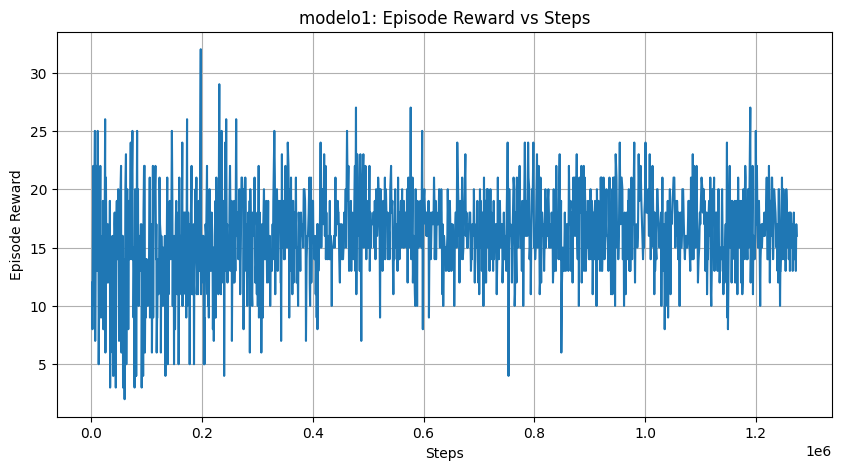

[INFO] Hiperparámetros cargados desde /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/modelo1.json
[DQN] Cargando último checkpoint: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/checkpoints/dqn_SpaceInvaders-v0_weights_1750000.h5f
Testing for 10 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 19.000, steps: 715
Episode 2: reward: 19.000, steps: 710
Episode 3: reward: 18.000, steps: 721
Episode 4: reward: 19.000, steps: 719
Episode 5: reward: 19.000, steps: 719
Episode 6: reward: 19.000, steps: 717
Episode 7: reward: 19.000, steps: 727
Episode 8: reward: 18.000, steps: 708
Episode 9: reward: 19.000, steps: 738
Episode 10: reward: 19.000, steps: 711
Recompensa media sobre 10 episodios: 18.8


In [ ]:
model_name="modelo1"

# CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
# PATH DEL LOGGER
csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')
# DIBUJAR GRÁFICA
graph_training_csv(csv_path, MODEL_DIR, model_name, save_clean_csv=False)
load_hyperparams(model_name)

# MODELO
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,
               gamma=GAMMA,
               target_model_update=MODEL_UPDATE,
               train_interval=4,
               delta_clip=DELTA_CLIP)
dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

# Carga de pesos
_, _,latest_checkpoint= load_last_checkpoint(dqn)
dqn.load_weights(latest_checkpoint)
history=dqn.test(env, nb_episodes=10, visualize=False)
episode_rewards = history.history['episode_reward']
average_reward = sum(episode_rewards) / len(episode_rewards)
print(f"Recompensa media sobre 10 episodios: {average_reward}")

 Utilizando los hiperparámetros por defecto podemos apreciar que al inicio del entrenamiento (menos de 200,000 pasos) hay una alta variabilidad en las recompensas por episodio, con valores que van desde muy bajos hasta unos 30 puntos. Esto es típico, ya que el agente está explorando y aprendiendo. Después de los 200,000 pasos, la recompensa se mantiene relativamente estable en un rango entre 10 y 20 puntos, con picos esporádicos hacia 25. Esto sugiere que el modelo ha aprendido una política relativamente buena, aunque no llega consistentemente a la recompensa mínima. No se esperan mejoras después de los 600,000 pasos.

 Con respecto al test en 10 episodios, apreciamos una gran estabilización entre 18 y 19 puntos de recompensa, sin embargo, no es suficiente para alcanzar el objetivo del proyecto.

### Modelo 1.2

[INFO] Gráfica guardada en: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo2/modelo2_episode_reward_fixed_steps.png


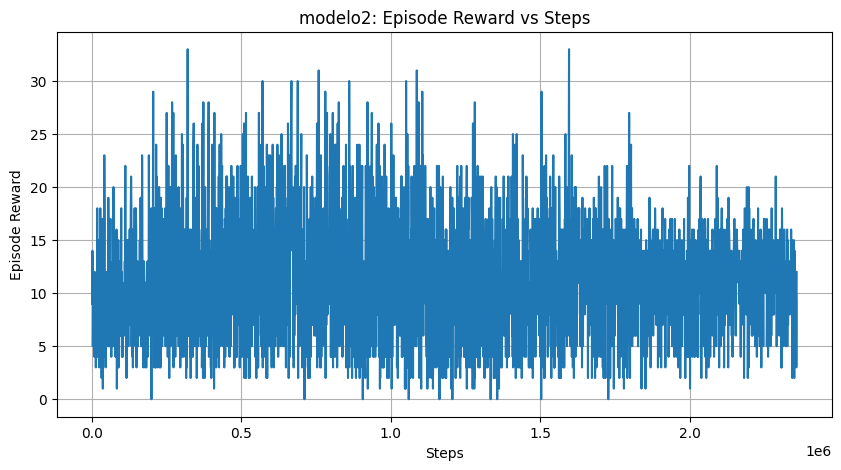

[INFO] Hiperparámetros cargados desde /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo2/modelo2.json
[DQN] Cargando último checkpoint: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo2/checkpoints/dqn_SpaceInvaders-v0_weights_2325000.h5f
Testing for 10 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 7.000, steps: 939
Episode 2: reward: 8.000, steps: 947
Episode 3: reward: 5.000, steps: 637
Episode 4: reward: 4.000, steps: 908
Episode 5: reward: 6.000, steps: 903
Episode 6: reward: 5.000, steps: 965
Episode 7: reward: 5.000, steps: 955
Episode 8: reward: 5.000, steps: 933
Episode 9: reward: 5.000, steps: 948
Episode 10: reward: 5.000, steps: 954
Recompensa media sobre 10 episodios: 5.5


In [ ]:
model_name="modelo2"

# CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
# PATH DEL LOGGER
csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')
# DIBUJAR GRÁFICA
graph_training_csv(csv_path, MODEL_DIR, model_name, save_clean_csv=False)
load_hyperparams(model_name)

# MODELO
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,
               gamma=GAMMA,
               target_model_update=MODEL_UPDATE,
               train_interval=4,
               delta_clip=DELTA_CLIP)
dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

# Carga de pesos
_, _,latest_checkpoint= load_last_checkpoint(dqn)
dqn.load_weights(latest_checkpoint)
history=dqn.test(env, nb_episodes=10, visualize=False)
episode_rewards = history.history['episode_reward']
average_reward = sum(episode_rewards) / len(episode_rewards)
print(f"Recompensa media sobre 10 episodios: {average_reward}")

En este segundo modelo, el entrenamiento se extendió a 3,000,000 pasos totales. Una modificación crucial fue establecer el decaimiento de ϵ a lo largo de 2,500,000 pasos. El gráfico de las recompensas nos muestra el progreso hasta aproximadamente 2.25 millones de pasos del entorno.

Las recompensas en el entrenamiento se mantienen predominante en el intervalo de 15 a 20 puntos a lo largo de casi todo el gráfico. Observamos una gran variabilidad en las recompensas por episodio, sin una tendencia clara y sostenida al alza. Esta ausencia de mejora y la persistencia de la alta variabilidad se deben directamente al decaimiento extremadamente lento de ϵ: al tardar 2.5 millones de pasos en decaer, el agente permanece en una fase de exploración predominantemente aleatoria durante la mayor parte de su entrenamiento, lo que impide que la política se consolide y explote el conocimiento adquirido de manera eficiente.

Con respecto al test en 10 episodios, los resultados fueron notablemente peores, con una recompensa media de 5.5 puntos. Sin embargo, es destacable que el agente logró sobrevivir, en general, unos 200 pasos más por episodio en estas pruebas en comparación con el modelo anterior (pasando de 700 a 900 pasos aprox.). Esto último nos lleva a pensar que la plítica final del agente influenciada por la prolongada fase de exploración, tiene un carácter defensivo y poco ambicioso. El agente aprende a mantenerse vivo, pero la constante aleatoriedad no le permite refinar las acciones necesarias para maximizar la puntuación.

### Modelo 1.3

[INFO] Gráfica guardada en: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo3/modelo3_episode_reward_fixed_steps.png


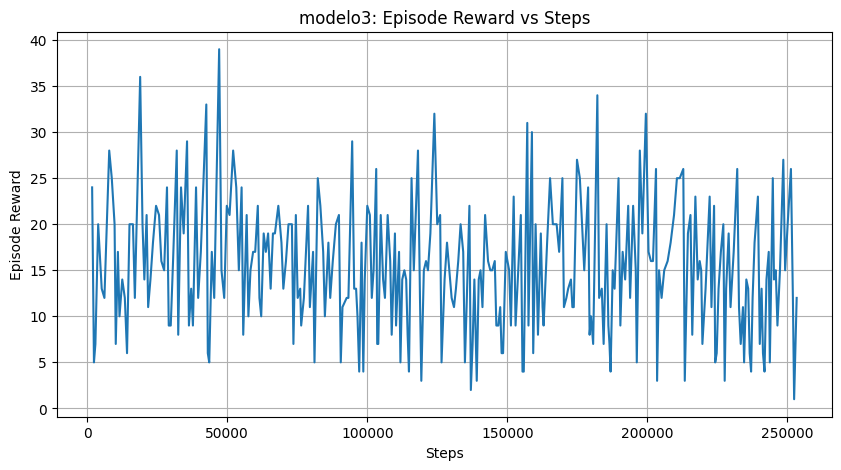

[INFO] Hiperparámetros cargados desde /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo3/modelo3.json
[DQN] Cargando último checkpoint: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo3/checkpoints/dqn_SpaceInvaders-v0_weights_1450000.h5f
Testing for 10 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 17.000, steps: 770
Episode 2: reward: 9.000, steps: 616
Episode 3: reward: 15.000, steps: 640
Episode 4: reward: 8.000, steps: 674
Episode 5: reward: 9.000, steps: 538
Episode 6: reward: 10.000, steps: 618
Episode 7: reward: 12.000, steps: 835
Episode 8: reward: 8.000, steps: 397
Episode 9: reward: 10.000, steps: 515
Episode 10: reward: 11.000, steps: 900
Recompensa media sobre 10 episodios: 10.9


In [ ]:
model_name="modelo3"

# CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
# PATH DEL LOGGER
csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')
# DIBUJAR GRÁFICA
graph_training_csv(csv_path, MODEL_DIR, model_name, save_clean_csv=False)
load_hyperparams(model_name)

# MODELO
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,
               gamma=GAMMA,
               target_model_update=MODEL_UPDATE,
               train_interval=4,
               delta_clip=DELTA_CLIP)
dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

# Carga de pesos
_, _,latest_checkpoint= load_last_checkpoint(dqn)
dqn.load_weights(latest_checkpoint)
history=dqn.test(env, nb_episodes=10, visualize=False)
episode_rewards = history.history['episode_reward']
average_reward = sum(episode_rewards) / len(episode_rewards)
print(f"Recompensa media sobre 10 episodios: {average_reward}")

Volvemos a los hiperparámetros originales pero haciendo una variación en el ratio de aprendizaje, bajándolo a 0.00001.

La gráfica del entrenamiento nos muestra que con 260,000 pasos no podemos visualizar una tendencia clara, encontrandose, de hecho, cierto decrecimiento en los puntos de los últimos 50,000 pasos. Por otro lado, podemos apreciar cierta regularidad entre los 150,000 y 200,000 pasos, pudiendo haber sido necesaria una parada temprana. Esto no cambia el hecho de que el entrenamiento debió ser más largo para alcanzar una regularidad en los resultados.

Este último comentario se hace más fuerte en el test donde podemos apreciar que las puntuaciones siguen una media de 10.9 pero con picos en algunos episodios con una puntuación de 15 y 17 puntos, lo que nos da a entender que hay una falta de estabilidad en el modelo.

### Modelo 1.4

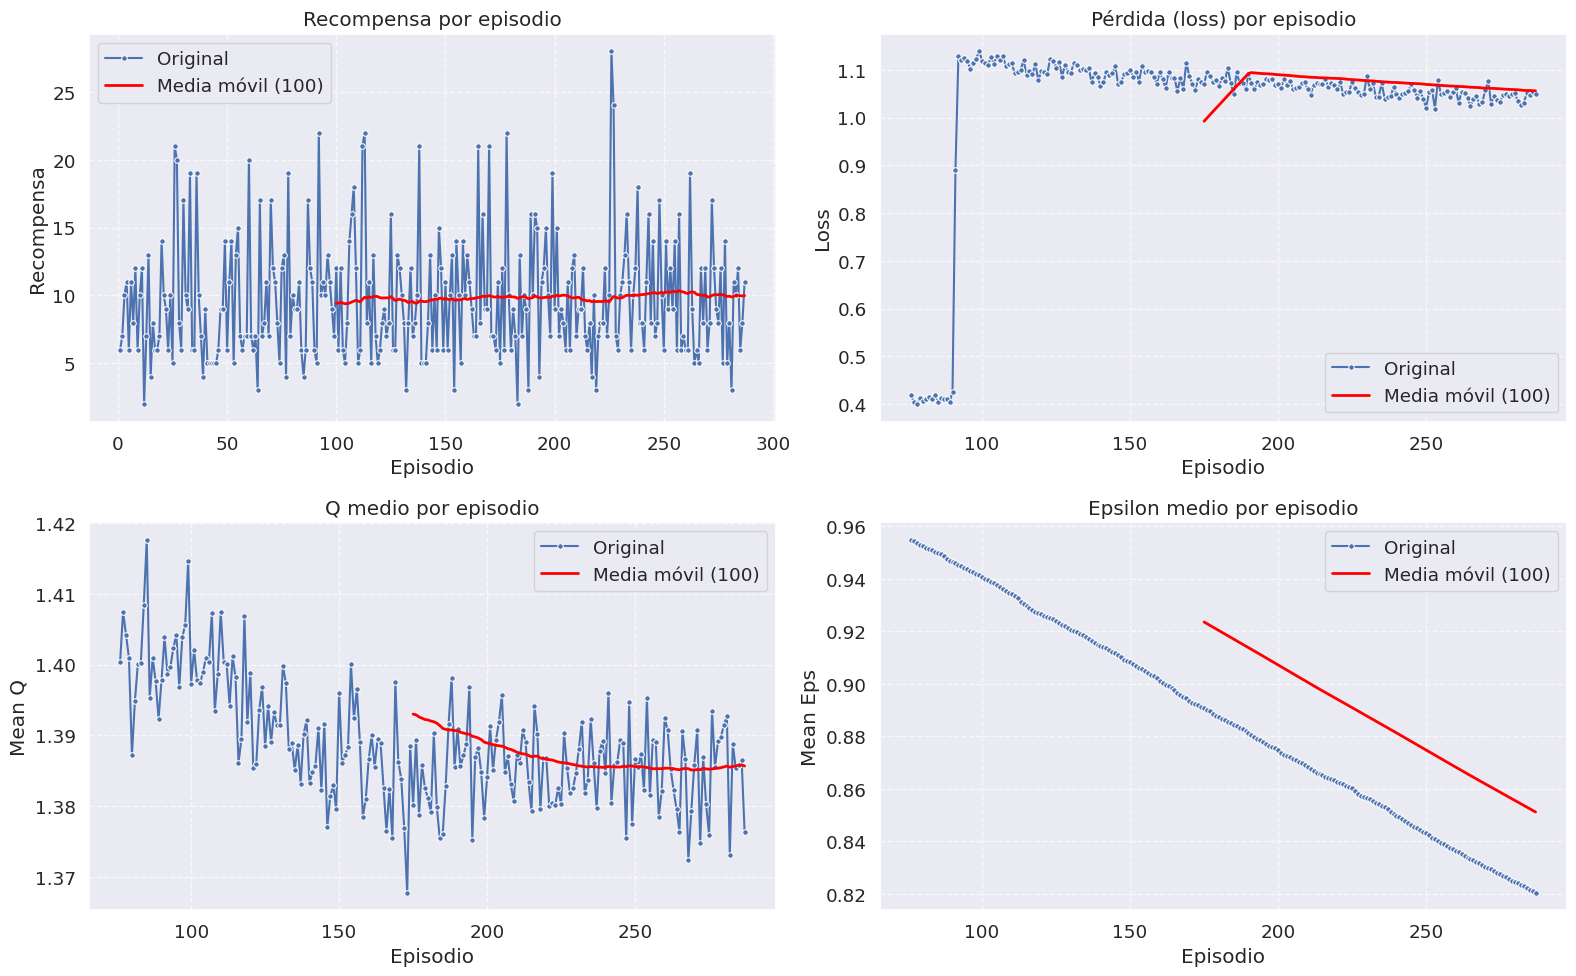

Gráfico guardado en: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo4/graphs/20250630193453_modelo4_training_analyze_graph.png
CSV de informe guardado en: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo4/graphs/20250630193453_modelo4_training_analyze_log.csv

INFORME DEL TRAINING (Todas las métricas)
----------------------------------------
Episodios totales: 287
Recompensa media: 9.71
Recompensa máxima: 28.0
Recompensa mínima: 2.0
Loss medio: 1.027201
Mean Q medio: 1.388958
Epsilon medio: 0.887332
Pasos medios por episodio: 99266.67
La recompensa final (11.00) es mayor que la inicial (6.00), indicando una mejora.

INFORME DEL TRAINING (últimos 100 episodios completados 187 al 286)
----------------------------------------
Episodios totales: 286
Recompensa media: 9.96
Recompensa máxima: 28.0
Recompensa mínima: 3.0
Loss medio: 1.056162
Mean Q medio: 1.385816
Epsilon medio: 0.851835
Pasos medios por episodio: 164977.02
La recompens

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 16.000, steps: 1084
Episode 2: reward: 12.000, steps: 747
Episode 3: reward: 12.000, steps: 703
Episode 4: reward: 4.000, steps: 355
Episode 5: reward: 11.000, steps: 689
Episode 6: reward: 10.000, steps: 577
Episode 7: reward: 10.000, steps: 628
Episode 8: reward: 14.000, steps: 822
Episode 9: reward: 12.000, steps: 752
Episode 10: reward: 26.000, steps: 1134
Recompensa media sobre 10 episodios: 12.7


In [ ]:
model_name="modelo4"

# CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
# PATH DEL LOGGER
csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')
# DIBUJAR GRÁFICA
analyze_training(model_name,100)
load_hyperparams(model_name)

# MODELO
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,
               gamma=GAMMA,
               target_model_update=MODEL_UPDATE,
               train_interval=4,
               delta_clip=DELTA_CLIP)
dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

# Carga de pesos
_, _,latest_checkpoint= load_last_checkpoint(dqn)
dqn.load_weights(latest_checkpoint)
history=dqn.test(env, nb_episodes=10, visualize=False)
episode_rewards = history.history['episode_reward']
average_reward = sum(episode_rewards) / len(episode_rewards)
print(f"Recompensa media sobre 10 episodios: {average_reward}")

Hemos aumentado el ratio de aprendizaje a 0.00005 y mejorado el callback del logger definiendo una nueva función para hacer un estudio más exhaustivo del entrenamiento, donde en este caso podemos conocer las medias móviles de la puntuación, la pérdida, el valor Q y el decaimiento de ϵ. Hemos entrenado durante 300 episodios (300 mil pasos sin consideramos 1000 pasos por episodio).

El entrenamiento del modelo nos muestra una media de 10 puntos por episodio que tiene algunos picos de 27 puntos pero en general oscila entre los 5 y 15 puntos. Con respecto a la pérdida por episodio, esta se mantiene ligeramente decreciente con una media que oscila entre los 1.05-1.1. Podríamos decir que la pérdida está estancada en un valor alto, lo que sugiere que el modelo no está aprendiendo eficientemente de sus experiencias. Por otro lado, el valor Q medio sigue una tendencia decreciente, lo cual es preocupante al indicar que el agente está prediciendo que las recompensas futuras serán cada vez peores.

Uno de los problemas principales es el hecho de que la aleatoriedad de ϵ solo se haya reducido hasta un 80% lo que lleva a que el agente haya actuado de forma aleatoria la mayor parte de las veces, imposibilitando la exploración en situaciones más ambiciosas.

Los resultados del test nos muestran que se ha mejorado algo la puntuación media con respecto al modelo 1.3, sin embargo, sigue siendo inferior a los 18.8 de la fase estable del modelo 1.1. También se puede apreciar una variabilidad que ya fue notable en las últimas etapas del entrenamiento, oscilando los valores de las recompensas desde los 4 puntos hasta los 26.



### Modelo 1.5

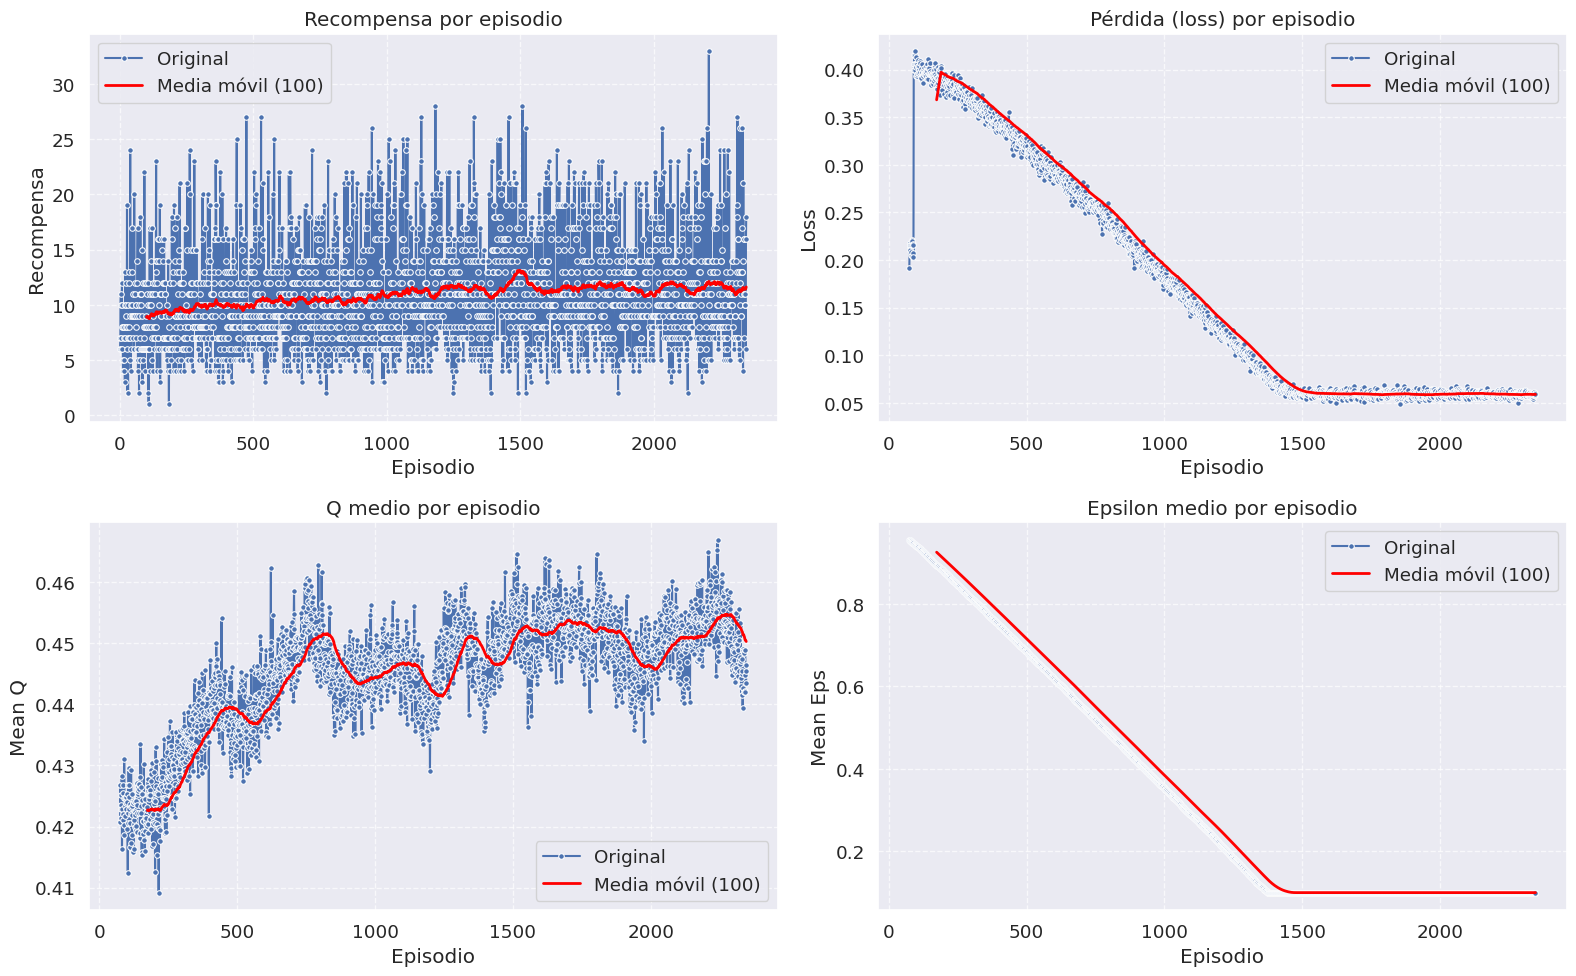

Gráfico guardado en: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo5/graphs/20250630193549_modelo5_training_analyze_graph.png
CSV de informe guardado en: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo5/graphs/20250630193549_modelo5_training_analyze_log.csv

INFORME DEL TRAINING (Todas las métricas)
----------------------------------------
Episodios totales: 2346
Recompensa media: 10.90
Recompensa máxima: 33.0
Recompensa mínima: 1.0
Loss medio: 0.169788
Mean Q medio: 0.445032
Epsilon medio: 0.347899
Pasos medios por episodio: 859231.77
La recompensa final (18.00) es mayor que la inicial (6.00), indicando una mejora.

INFORME DEL TRAINING (últimos 100 episodios completados 2246 al 2345)
----------------------------------------
Episodios totales: 2345
Recompensa media: 11.51
Recompensa máxima: 27.0
Recompensa mínima: 4.0
Loss medio: 0.058803
Mean Q medio: 0.450409
Epsilon medio: 0.100000
Pasos medios por episodio: 1710607.46
La r

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 11.000, steps: 650
Episode 2: reward: 13.000, steps: 646
Episode 3: reward: 28.000, steps: 1540
Episode 4: reward: 4.000, steps: 385
Episode 5: reward: 12.000, steps: 713
Episode 6: reward: 11.000, steps: 659
Episode 7: reward: 17.000, steps: 862
Episode 8: reward: 16.000, steps: 1507
Episode 9: reward: 17.000, steps: 1041
Episode 10: reward: 19.000, steps: 1312
Recompensa media sobre 10 episodios: 14.8


In [ ]:
model_name="modelo5"

# CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
# PATH DEL LOGGER
csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')
# DIBUJAR GRÁFICA
analyze_training(model_name,100)
load_hyperparams(model_name)

# MODELO
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,
               gamma=GAMMA,
               target_model_update=MODEL_UPDATE,
               train_interval=4,
               delta_clip=DELTA_CLIP)
dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

# Carga de pesos
_, _,latest_checkpoint= load_last_checkpoint(dqn)
dqn.load_weights(latest_checkpoint)
history=dqn.test(env, nb_episodes=10, visualize=False)
episode_rewards = history.history['episode_reward']
average_reward = sum(episode_rewards) / len(episode_rewards)
print(f"Recompensa media sobre 10 episodios: {average_reward}")

Hemos reducido el tamaño de la memoria a 100,000 debido a limitaciones de recursos de Colab. Hemos vuelto a probar con la tasa de aprendizaje de 0.00001.

La media móvil de la recompensa por episodio sigue una tendencia ascendente en este caso que empieza en los 8-9 puntos y asciende de manera constante hasta estabilizarse alrededor de 11-12 puntos en los últimos episodios. En las últimas etapas se aprecian además picos de entre 25 y 30 puntos.

Se ha conseguido una mejora significativa en la pérdida al decrecer de forma constante y suave a lo largo de los episodios, estabilizandose alrededor de 0.05 y 0.07, tras unos 1500 episodios. Esto es una señal muy positiva ya que indica que el agente está aprendiendo eficientemente a predecir los Q-valores. La tasa de aprendizaje de 0.00001 parece haber mejorado este aspecto.

Los Q-valores son además más optimistas, prediciendo mayores recompensas futuras a medida que va adquiriendo más experiencia. Sin embargo hay bastantes oscilaciones de la media móvil a lo largo del entrenamiento.

Se han mitigado también los problemas con el decaymiento de épsilon, quizás, sin embargo, demasiado, haciendo que en los últimos 500 episodios no haya una exploración del entorno pero si una estabilización del puntuaje.

La recompensa media en el test es de 14.8 para estos 10 episodios. Es superior a la media de 10.9 del modelo 1.3 y la de 12.7 del modelo 1.4. Sin embargo, no se alcanza el pico de 18.8 del modelo 1.1. De todas formas, la media de la puntuación por episodio está en una fase ascendente, y los gráficos sugieren que continuaría mejorando si se siguiese el proceso de entrenamiento.


### Modelo 1.6

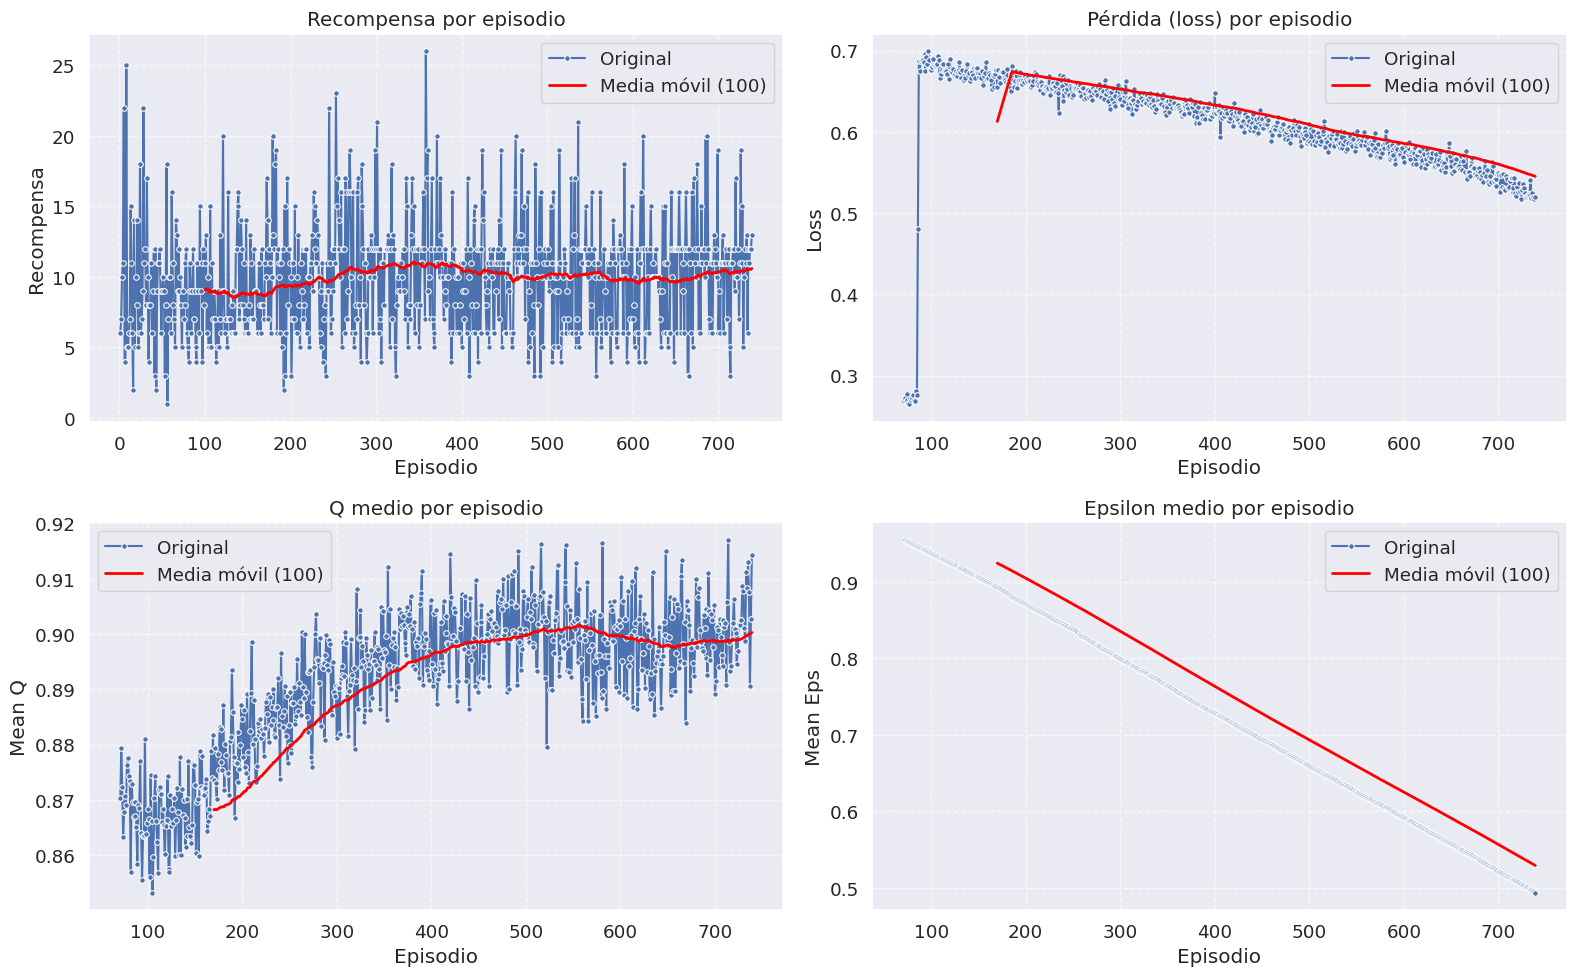

Gráfico guardado en: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo6/graphs/20250630193758_modelo6_training_analyze_graph.png
CSV de informe guardado en: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo6/graphs/20250630193758_modelo6_training_analyze_log.csv

INFORME DEL TRAINING (Todas las métricas)
----------------------------------------
Episodios totales: 739
Recompensa media: 10.00
Recompensa máxima: 26.0
Recompensa mínima: 1.0
Loss medio: 0.606840
Mean Q medio: 0.891610
Epsilon medio: 0.726569
Pasos medios por episodio: 277767.40
La recompensa final (13.00) es mayor que la inicial (6.00), indicando una mejora.

INFORME DEL TRAINING (últimos 100 episodios completados 639 al 738)
----------------------------------------
Episodios totales: 738
Recompensa media: 10.53
Recompensa máxima: 20.0
Recompensa mínima: 3.0
Loss medio: 0.545493
Mean Q medio: 0.900110
Epsilon medio: 0.529875
Pasos medios por episodio: 522753.60
La recomp

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 12.000, steps: 852
Episode 2: reward: 11.000, steps: 823
Episode 3: reward: 25.000, steps: 1672
Episode 4: reward: 6.000, steps: 671
Episode 5: reward: 5.000, steps: 413
Episode 6: reward: 11.000, steps: 798
Episode 7: reward: 12.000, steps: 882
Episode 8: reward: 12.000, steps: 854
Episode 9: reward: 12.000, steps: 811
Episode 10: reward: 12.000, steps: 824
Recompensa media sobre 10 episodios: 11.8


In [ ]:
model_name="modelo6"

# CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
# PATH DEL LOGGER
csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')
# DIBUJAR GRÁFICA
analyze_training(model_name,100)
load_hyperparams(model_name)

# MODELO
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,
               gamma=GAMMA,
               target_model_update=MODEL_UPDATE,
               train_interval=4,
               delta_clip=DELTA_CLIP)
dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

# Carga de pesos
_, _,latest_checkpoint= load_last_checkpoint(dqn)
dqn.load_weights(latest_checkpoint)
history=dqn.test(env, nb_episodes=10, visualize=False)
episode_rewards = history.history['episode_reward']
average_reward = sum(episode_rewards) / len(episode_rewards)
print(f"Recompensa media sobre 10 episodios: {average_reward}")

Hemos vuelto a los hiperparámetros originales aumentando a 5 mill. el número de pasos de entrenamiento y el número de pasos de decaimiento de ϵ a 1 mill. Se paró el entrenamiento en los 2.25 mill de pasos al no esperarse una mejora en las recompensas.

Existe una alta variabilidad que ha sido recurrente en todos los modelos, con picos ocasionales de hasta 25 puntos pero con una media móvil que se mantiene plana y baja, rondando los 9-10 puntos. Resultados peores tanto en el modelo 1.1 (18.8 puntos aprox.) como en el modelo 1.5 (14.8 y con tendencia creciente).

Con respecto a la pérdida, esta se inicia en un valor de aproximadamente 0.7 y, aunque muestra una tendencia decreciente a lo largo de los episodios, su valor final de aprox. 0.5/0.6 es considerablemente más alto que la pérdida casi nula del modelo 1.5.

Si hemos obtenido, sin embargo, muy buenos resultados en el valor Q con una tendencia ascendente sin oscilaciones, pasando de 0.86 a 0.9/0.91. El agente estaría empezando a ver más recompensas en el futuro.

La recompensa media obtenida en el test fue de 11.8. Esta cifra es inferior a la del Modelo 5 (14.8) y mucho menor que la fase estable del Modelo 1 (18.8). La variabilidad en estas 10 pruebas (entre 5 y 25 puntos) es considerable (pero típico en Space Invaders).

# Modelos D

## Modelo D1

Aquí se presenta una variante del modelo 1 en la que introducimos pequeños cambios en la arquitectura que nos pueden ayudar a conseguir la puntuación mínima, ya que en el modelo 1 nos quedamos muy cerca.

Los cambios consisten en un padding='same' para preservar mejor las características espaciales en bordes, una 'leakyReLU' para evitar neuronas muertas con un factor alpha de una décima (estandar en juegos), una capa extra de 128 filtros que captura patrones más complejos en el movimiento de los marcianitos, un dropout del 20% para reducir el overfitting y una reducción de las capas densas que es más eficiente y más que suficiente para el juego Space Invaders.

Se espera que la combinación de la 'LeakyReLU' y el 'Dropout' mejoren el flujo de gradientes y la generalización y que la tercera capa convolucional detecte patrones más finos en los disparos y los movimientos.

La reducción de 'MEMORY_SIZE' a 300,000 puede mejorar el aprendizaje al priorizar experiencias recientes, como se vio en el Modelo 5. Un 'GAMMA' de 0.97 podría favorecer recompensas inmediatas. La actualización de la red objetivo cada 5,000 pasos promueve mayor estabilidad en los Q-valores.


In [ ]:
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout



model_name="modelo_D1"
model = Sequential()

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

#Capa de preprocesamiento
if K.image_data_format() == 'channels_last':
    model.add(Permute((2, 3, 1), input_shape=input_shape))
else:
    model.add(Permute((1, 2, 3), input_shape=input_shape))

model.add(Lambda(lambda x: x / 255.0))

#Bloques convolucionales mejorados:
model.add(Convolution2D(32, (8, 8), strides=(4, 4), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU en lugar de ReLU

model.add(Convolution2D(64, (4, 4), strides=(2, 2), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(Convolution2D(128, (3, 3), strides=(1, 1), padding='same'))  # Nueva capa
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

#Capas densas optimizadas:
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))  # Regularización

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))

#Salida:
model.add(Dense(nb_actions))
model.add(Activation('linear'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute (Permute)            (None, 84, 84, 4)         0         
_________________________________________________________________
lambda (Lambda)              (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 21, 21, 32)        8224      
_________________________________________________________________
batch_normalization (BatchNo (None, 21, 21, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        32832     
__________________________________________________

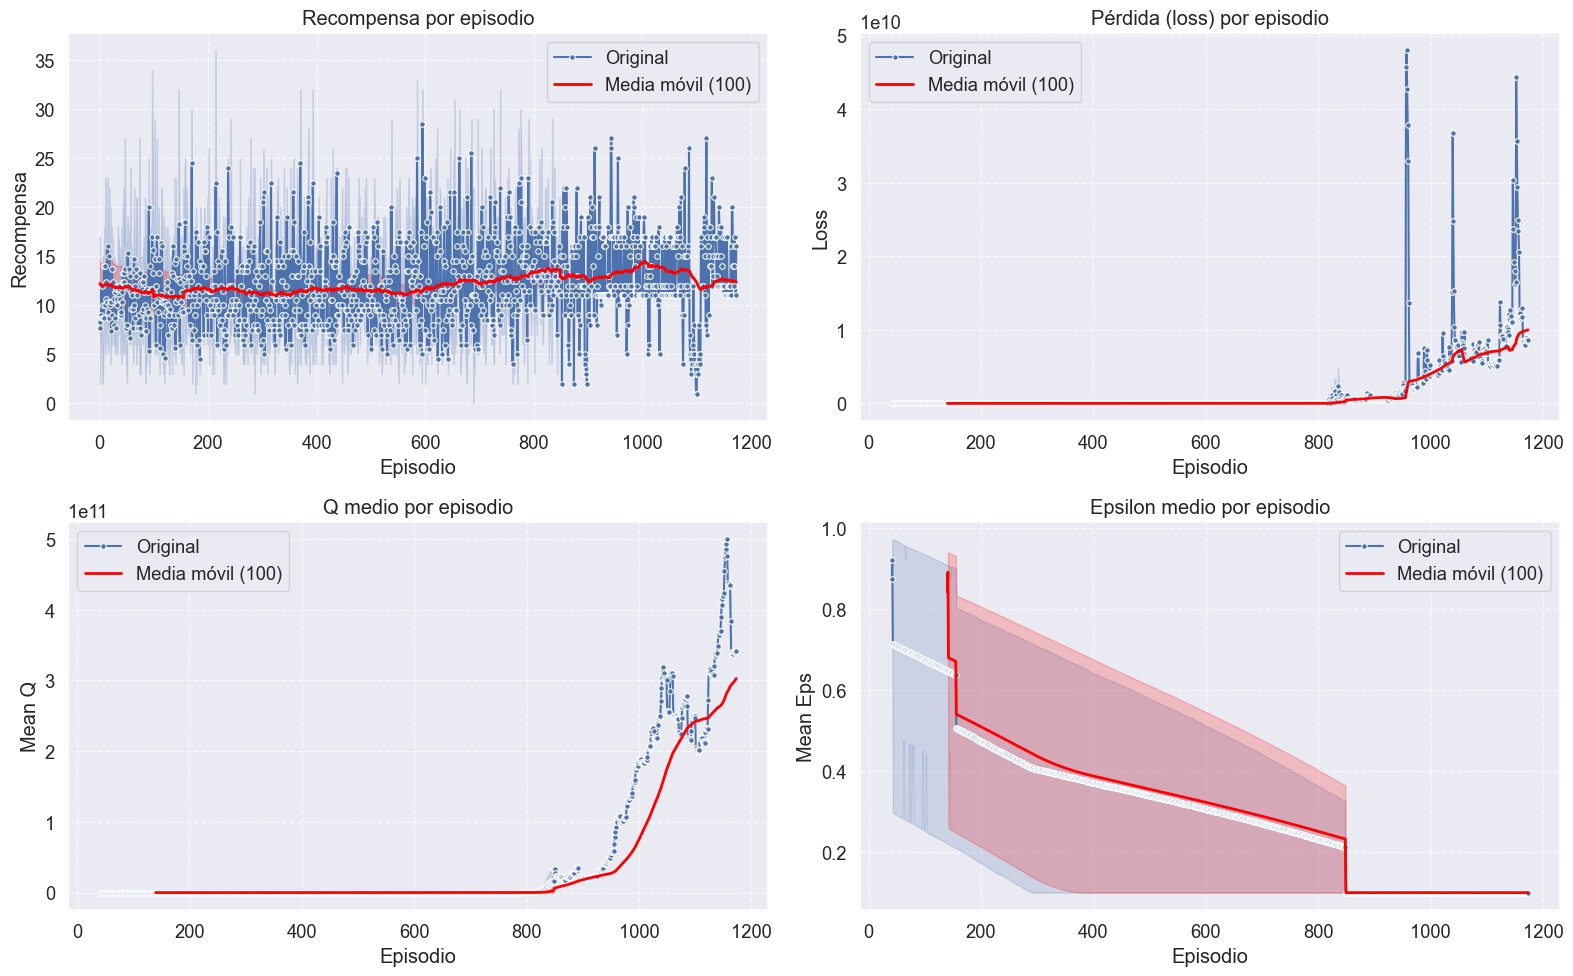

Gráfico guardado en: ./models\modelo_D1\graphs\20250630234428_modelo_D1_training_analyze_graph.png
CSV de informe guardado en: ./models\modelo_D1\graphs\20250630234428_modelo_D1_training_analyze_log.csv

INFORME DEL TRAINING (Todas las métricas)
----------------------------------------
Episodios totales: 1173
Recompensa media: 11.96
Recompensa máxima: 36.0
Recompensa mínima: 0.0
Loss medio: 965831836.181411
Mean Q medio: 27851014004.225334
Epsilon medio: 0.359695
Pasos medios por episodio: 405244.67
La recompensa final (16.00) es mayor que la inicial (6.00), indicando una mejora.

INFORME DEL TRAINING (últimos 100 episodios completados 1073 al 1172)
----------------------------------------
Episodios totales: 1172
Recompensa media: 12.40
Recompensa máxima: 27.0
Recompensa mínima: 1.0
Loss medio: 9971800620.000000
Mean Q medio: 301419978000.000000
Epsilon medio: 0.100000
Pasos medios por episodio: 1005251.90
La recompensa final (11.00) no ha mejorado significativamente respecto a la inic

x:\08_MIAR\actividades\proyecto_practico\venv_rl\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Episode 1: reward: 18.000, steps: 722
Episode 2: reward: 18.000, steps: 724
Episode 3: reward: 18.000, steps: 717
Episode 4: reward: 18.000, steps: 717
Episode 5: reward: 18.000, steps: 709
Episode 6: reward: 18.000, steps: 720
Episode 7: reward: 18.000, steps: 711
Episode 8: reward: 18.000, steps: 722
Episode 9: reward: 18.000, steps: 729
Episode 10: reward: 18.000, steps: 718
Recompensa media sobre 10 episodios: 18.0


In [ ]:
model_name="modelo_D1"

# CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
# PATH DEL LOGGER
csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')
# DIBUJAR GRÁFICA
analyze_training(model_name,100)
load_hyperparams(model_name)

# MODELO
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,
               gamma=GAMMA,
               target_model_update=MODEL_UPDATE,
               train_interval=4,
               delta_clip=DELTA_CLIP)
dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

# Carga de pesos
_, _,latest_checkpoint= load_last_checkpoint(dqn)
dqn.load_weights(latest_checkpoint)
history=dqn.test(env, nb_episodes=10, visualize=False)
episode_rewards = history.history['episode_reward']
average_reward = sum(episode_rewards) / len(episode_rewards)
print(f"Recompensa media sobre 10 episodios: {average_reward}")

Con respecto a la recompensa por episodio, el gráfico muestra una mejora clara y una tendencia ascendente en la recompensa media. comienza alrededor de 6 puntos y, tras una fase de variabilidad, empieza a subir notablemente alrededor del episodio 800-900, alcanzando y manteniendo valores por encima de 10-15. Se observan picos individuales que superan los 25 y llegan hasta los 35.

La pérdida, por otro lado, se mantiene en un valor cercano a cero hasta aproximadamente el episodio 850, donde luego se dispara a valores de hasta 10 trillones y se vuelve muy inestable. Esto da a entender que en los últimos episodios entrenamiento se ha vuelto completamente inestable y ha divergido. Esto anula cualquier mejora visible en la recompensa en esa fase. Aunque la recompensa sube al final, es probable que se deba a la alta exploración residual o a un comportamiento errático.

El valor Q sufre del mismo comportamiento disparandose alrededor del episodio 850. El agente está prediciendo recompensas futuras absurdas e infinitamente grandes, lo cual es irreal y un síntoma de inestabilidad numérica en la red.

Esta divergencia puede haberse debido a una tasa de aprendizaje demasiado alta, una mala inicialización en los pesos o gradientes explosivos.

El test final del modelo D1 arrojó una recompensa media de 18.0 puntos en 10 epsiodios, con una consistencia perfecta en la puntuación y pasos por episodio. Esta recompensa es muy competitiva y nos pone en el camino de mejorar los resultados del modelo 1 (18.8 puntos).

## Modelo D1+

Aquí se presenta una variante del modelo D!, donde buscamos mejorar aún más el rendimiento y la estabilidad del aprendizaje a través de refinamientos arquitectónicos y un ajuste más precios de los hiperparámetros. Las modificaciones se enfocan en dotar al modelo de una mayor robustez frente a las variaciones del entorno y en optimizar su capacidad para aprender políticas complejas y eficientes.

En busca de mejorar la generalización del modelo simulando pequeñas variaciones y ruido en los píxeles de las imágenes de entrada utilizamos un 'Gaussian Noise' en la capa de entrada. Por otro lado introducidmos SpatialDropout2D en lugar de Dropout convencional después de las capas convolucionales.

Inicializamos usando 'He Normal' de cara a evitar los problemas del modelo anterior con explotaciones de los gradientes. Esto ayudará a tener un entrenamiento más estable y rápido.

Los nuevos hiperparámetros complementan las mejoras arquitectónicas para optimizar el aprendizaje. La memoria de 400,000 y los pasos de calentamiento de 50,000 buscan una base de datos de experiencias más robustas. Además aumentamos gamma a 0.96 para enfocarnos en las recompensas inmediatas. Por otro lado, para combatir la divergencia previa, el ratio de aprendizaje se reduce a 0.00015 y el cl 0.5, buscando una convergencia más estable y prevenir la explosión de gradientes del modelo anterior.

Hemos prolongado la exploración de ϵ a 1,500,000 pasos para observar si beneficia un aprendizaje más profundo con la nueva arquitectura o si, por el contrario, retrasa la explotación efectiva, como en modelos anteriores.


In [ ]:
from tensorflow.keras.layers import LeakyReLU, GaussianNoise, SpatialDropout2D
from tensorflow.keras.layers import Dropout, Conv2D, Multiply



model = Sequential()

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

#Preprocesamiento
if K.image_data_format() == 'channels_last':
    model.add(Permute((2, 3, 1), input_shape=input_shape))
else:
    model.add(Permute((1, 2, 3), input_shape=input_shape))

model.add(Lambda(lambda x: x / 255.0))
model.add(GaussianNoise(0.01))  #Regularización en input

#Bloques convolucionales
model.add(Conv2D(64, (8, 8), strides=(4, 4), padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(SpatialDropout2D(0.1))

model.add(Conv2D(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(SpatialDropout2D(0.1))

#Capas densas
model.add(Flatten())
model.add(Dense(512, kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(256, kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha=0.1))

#Salida
model.add(Dense(nb_actions, kernel_initializer='glorot_uniform'))
model.add(Activation('linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_1 (Permute)          (None, 84, 84, 4)         0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 84, 84, 4)         0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        16448     
_________________________________________________________________
batch_normalization_3 (Batch (None, 21, 21, 64)        256       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 21, 21, 64)        0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 21, 21, 64)       

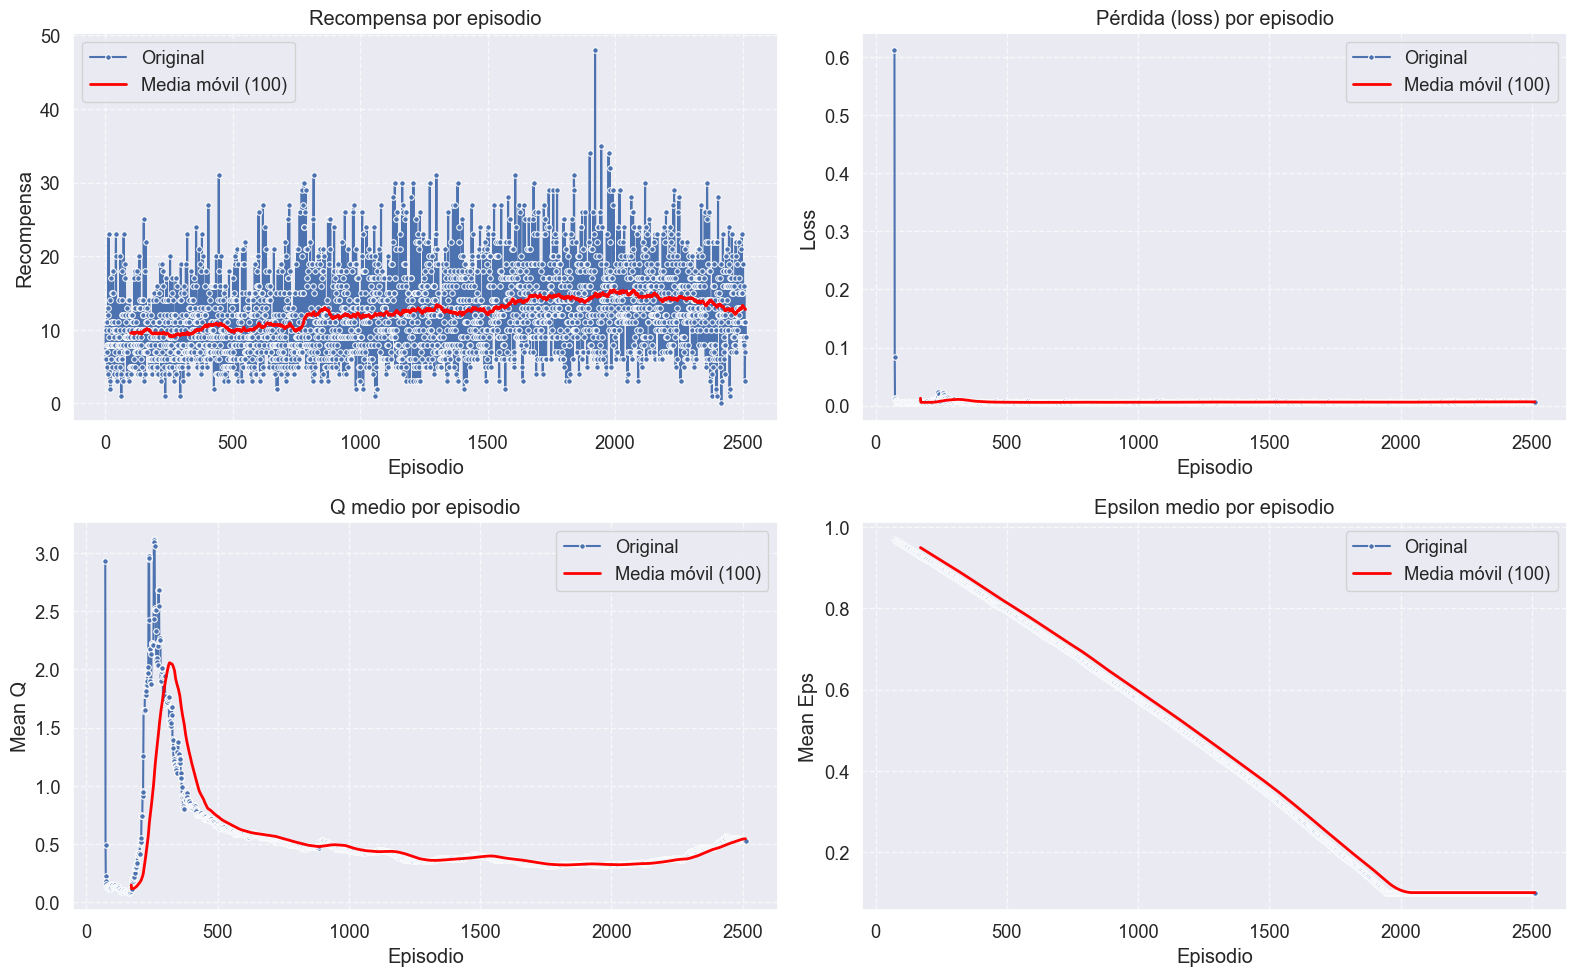

Gráfico guardado en: ./models\modelo_D1_Plus\graphs\20250630234515_modelo_D1_Plus_training_analyze_graph.png
CSV de informe guardado en: ./models\modelo_D1_Plus\graphs\20250630234515_modelo_D1_Plus_training_analyze_log.csv

INFORME DEL TRAINING (Todas las métricas)
----------------------------------------
Episodios totales: 2511
Recompensa media: 12.37
Recompensa máxima: 48.0
Recompensa mínima: 0.0
Loss medio: 0.006508
Mean Q medio: 0.513568
Epsilon medio: 0.453380
Pasos medios por episodio: 942764.10
La recompensa final (9.00) es mayor que la inicial (6.00), indicando una mejora.

INFORME DEL TRAINING (últimos 100 episodios completados 2411 al 2510)
----------------------------------------
Episodios totales: 2510
Recompensa media: 12.74
Recompensa máxima: 24.0
Recompensa mínima: 0.0
Loss medio: 0.006403
Mean Q medio: 0.545013
Epsilon medio: 0.100000
Pasos medios por episodio: 1954720.45
La recompensa final (11.00) es mayor que la inicial (6.00), indicando una mejora.
[INFO] Hiperparám

x:\08_MIAR\actividades\proyecto_practico\venv_rl\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Episode 1: reward: 6.000, steps: 711
Episode 2: reward: 3.000, steps: 378
Episode 3: reward: 13.000, steps: 954
Episode 4: reward: 3.000, steps: 601
Episode 5: reward: 7.000, steps: 687
Episode 6: reward: 16.000, steps: 1758
Episode 7: reward: 9.000, steps: 989
Episode 8: reward: 3.000, steps: 381
Episode 9: reward: 9.000, steps: 917
Episode 10: reward: 13.000, steps: 1064
Recompensa media sobre 10 episodios: 8.2


In [ ]:
model_name = "modelo_D1_Plus"

# CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
# PATH DEL LOGGER
csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')
# DIBUJAR GRÁFICA
analyze_training(model_name,100)
load_hyperparams(model_name)

# MODELO
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,
               gamma=GAMMA,
               target_model_update=MODEL_UPDATE,
               train_interval=4,
               delta_clip=DELTA_CLIP)
dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

# Carga de pesos
_, _,latest_checkpoint= load_last_checkpoint(dqn)
dqn.load_weights(latest_checkpoint)
history=dqn.test(env, nb_episodes=10, visualize=False)
episode_rewards = history.history['episode_reward']
average_reward = sum(episode_rewards) / len(episode_rewards)
print(f"Recompensa media sobre 10 episodios: {average_reward}")

El modelo D1+ representa un éxito en la estabilidad del entrenamiento, ya que la pérdida se mantuvo consistentemente baja y estable a lo largo de los 2511 episodios (0.006508). Esto demuestra que las mejoras arquitectónicas y los ajustes de hiperparámetros resolvieron la divergencia previa del modelo D1.

Sin embargo, esta estabilidad no se tradujo en una mejora de la recompensa. La recompensa media general fue de 12.37, y el test final en los 10 episodios muestra una media de 8.2 puntos, con variabilidad entre los episodios.

Este modelo ha solucionado los problemas con respecto a la robustez del entrenamiento, pero enfrenta la necesidad de convertir esa estabilidad en una política de juego consistentemente alta en recompensa. La mejora en la pérdida no refleja un aumento significativo en las puntuaciones del test.



## Modelo D1 Attention +

El modelo D1 Attention + es una evolución del diseño D1, enfocada en optimizar el rendimiento y la estabilidad. La adición de un mecanismo de Attention simple permite al modelo concentrarse en elementos críticos, optimizando la toma de decisiones. Se ha utilizado el ruido Gaussiano en la entrada, SpatialDropout2D para las capas convolucionales y la inicialización He Normal, optimizada para LeakyReLU, que asegura un mejor lujo de gradientes.

En paralelo, se han ajustado varios hiperparámetros. Memoria de 500,00 y pasos de calientamiento de 100,000. Hemos reducido a 0.95 el gamma y un model_update más frecuente (2,000)....

In [ ]:
from tensorflow.keras.layers import LeakyReLU, GaussianNoise, SpatialDropout2D
from tensorflow.keras.layers import Dropout, Conv2D, Multiply
from tensorflow.keras.initializers import he_normal, glorot_uniform


# 1. Definición del modelo con Attention
model_name = "modelo_D1_Attention_enhancedhyperparams"
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

# Capa de entrada
inputs = Input(shape=input_shape)

# Preprocesamiento
x = Permute((2, 3, 1))(inputs) if K.image_data_format() == 'channels_last' else Permute((1, 2, 3))(inputs)
x = Lambda(lambda x: x / 255.0)(x)
x = GaussianNoise(0.01)(x)

# Bloques convolucionales
x = Conv2D(64, (8, 8), strides=(4, 4), padding='same', kernel_initializer=he_normal())(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = SpatialDropout2D(0.1)(x)

x = Conv2D(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=he_normal())(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)

x = Conv2D(256, (3, 3), strides=(1, 1), padding='same', kernel_initializer=he_normal())(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = SpatialDropout2D(0.1)(x)

# Mecanismo de atención
attention = Conv2D(1, (1, 1), activation='sigmoid')(x)  # Mapa de atención (0 a 1)
x = Multiply()([x, attention])  # Aplicar atención

# Capas densas
x = Flatten()(x)
x = Dense(512, kernel_initializer=he_normal())(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.3)(x)

x = Dense(256, kernel_initializer=he_normal())(x)
x = LeakyReLU(alpha=0.1)(x)

# Salida
outputs = Dense(nb_actions, kernel_initializer=glorot_uniform(), activation='linear')(x)

# Crear modelo
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 84, 84)]  0                                            
__________________________________________________________________________________________________
permute_2 (Permute)             (None, 84, 84, 4)    0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 84, 84, 4)    0           permute_2[0][0]                  
__________________________________________________________________________________________________
gaussian_noise_1 (GaussianNoise (None, 84, 84, 4)    0           lambda_2[0][0]                   
____________________________________________________________________________________________

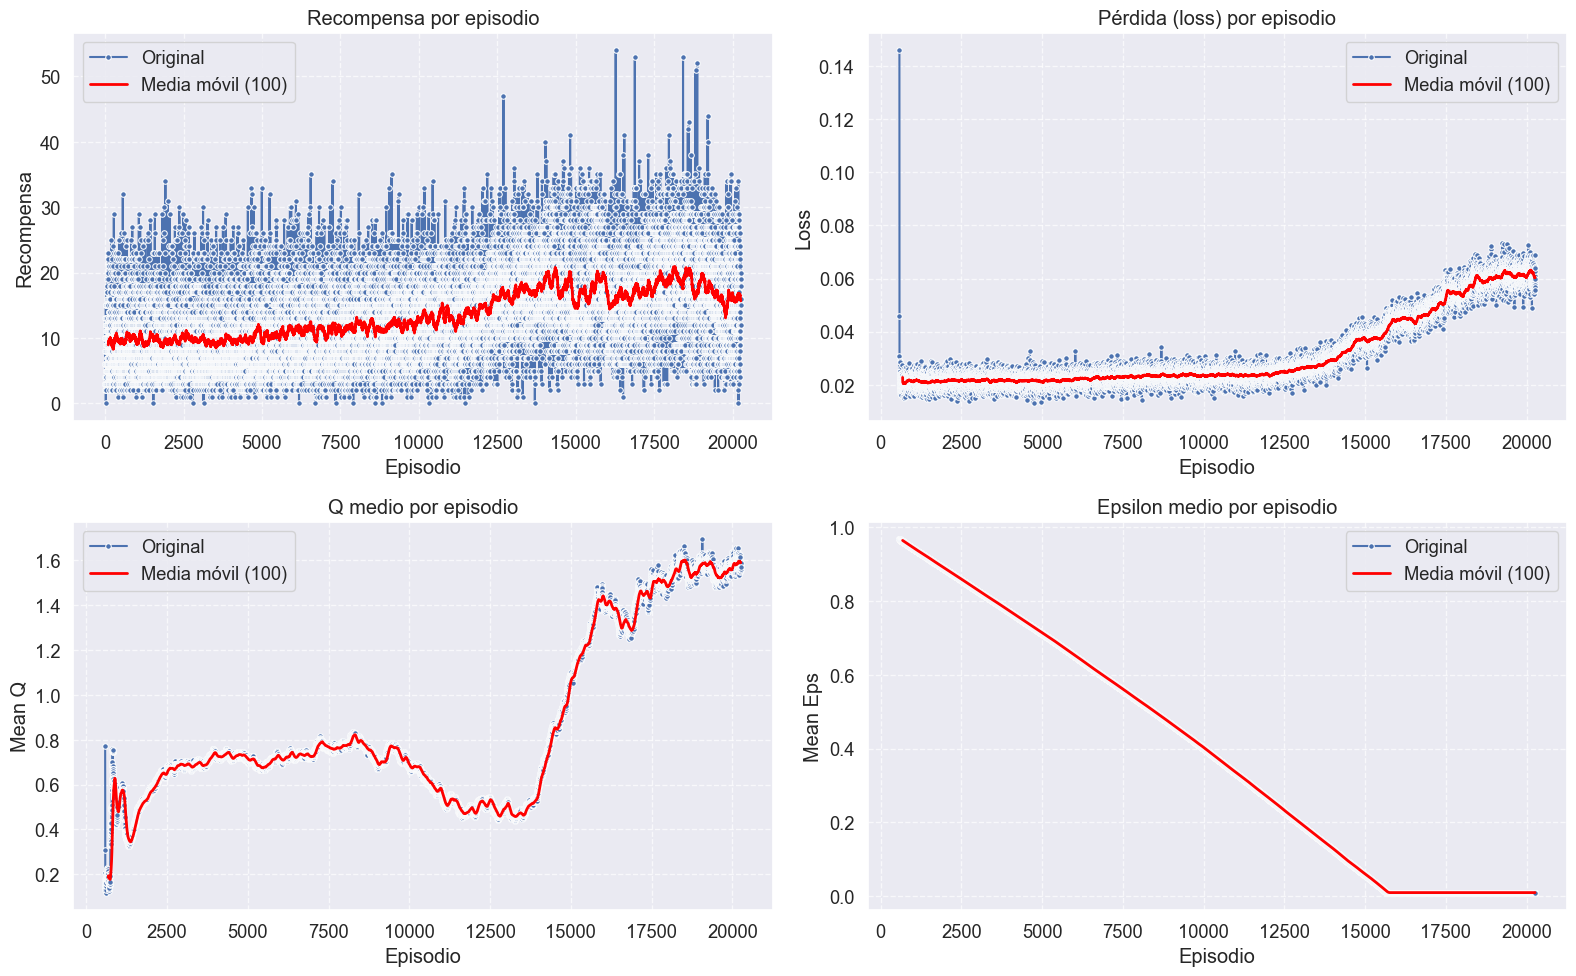

Gráfico guardado en: ./models\modelo_D1_Attention_enhancedhyperparams\graphs\20250630234638_modelo_D1_Attention_enhancedhyperparams_training_analyze_graph.png
CSV de informe guardado en: ./models\modelo_D1_Attention_enhancedhyperparams\graphs\20250630234638_modelo_D1_Attention_enhancedhyperparams_training_analyze_log.csv

INFORME DEL TRAINING (Todas las métricas)
----------------------------------------
Episodios totales: 20260
Recompensa media: 13.57
Recompensa máxima: 54.0
Recompensa mínima: 0.0
Loss medio: 0.031297
Mean Q medio: 0.864301
Epsilon medio: 0.391955
Pasos medios por episodio: 1904686.12
La recompensa final (15.00) es mayor que la inicial (6.00), indicando una mejora.

INFORME DEL TRAINING (últimos 100 episodios completados 20160 al 20259)
----------------------------------------
Episodios totales: 20259
Recompensa media: 15.74
Recompensa máxima: 34.0
Recompensa mínima: 0.0
Loss medio: 0.060484
Mean Q medio: 1.590418
Epsilon medio: 0.010000
Pasos medios por episodio: 3989

x:\08_MIAR\actividades\proyecto_practico\venv_rl\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


[DQN] Cargando último checkpoint: ./models\modelo_D1_Attention_enhancedhyperparams\checkpoints\dqn_SpaceInvaders-v0_weights_2760000.h5f
Testing for 10 episodes ...


x:\08_MIAR\actividades\proyecto_practico\venv_rl\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Episode 1: reward: 31.000, steps: 1039
Episode 2: reward: 24.000, steps: 871
Episode 3: reward: 24.000, steps: 852
Episode 4: reward: 23.000, steps: 940
Episode 5: reward: 30.000, steps: 1065
Episode 6: reward: 28.000, steps: 1062
Episode 7: reward: 26.000, steps: 1053
Episode 8: reward: 23.000, steps: 774
Episode 9: reward: 27.000, steps: 922
Episode 10: reward: 23.000, steps: 838
Recompensa media sobre 10 episodios: 25.9


In [ ]:
model_name = "modelo_D1_Attention_enhancedhyperparams"

# CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
# PATH DEL LOGGER
csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')
# DIBUJAR GRÁFICA
analyze_training(model_name,100)
load_hyperparams(model_name)

# MODELO
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,
               gamma=GAMMA,
               target_model_update=MODEL_UPDATE,
               train_interval=4,
               delta_clip=DELTA_CLIP)
dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

# Carga de pesos
_, _,latest_checkpoint= load_last_checkpoint(dqn)
dqn.load_weights(latest_checkpoint)
history=dqn.test(env, nb_episodes=10, visualize=False)
episode_rewards = history.history['episode_reward']
average_reward = sum(episode_rewards) / len(episode_rewards)
print(f"Recompensa media sobre 10 episodios: {average_reward}")

Hemos abarcado un entrenamiento extenso de 20,260 episodios donde destacamos que la recompensa ha iniciado baja pero ha ascendido significativamente a medida que avanzaba el entrenamiento, especialmente en las etapas finales, llegando a un nivel más alto que en modelos anteriores. Vemos picos individuales de recompensa muy altos de 54.4.

Tanto la pérdida como el valor Q se estabilizan a lo largo del entrenamiento, evitando la divergencia que se dió en D1.

La recompensa media de 25.9 puntos en el test final es la más alta y consistente alcanzada hasta ahora, superando los 18.0 puntos del modelo D1 y los 18.8 del modelo 1. Con esto se habría superado el objetivo de 20 puntos medios. Destacamos que ha sido posible gracias a entrenar el modelo durante 4 millones de pasos, sin embargo, el ajuste de hiperparámetros ha sido crucial para evitar la divergencia de la pérdida y el valor Q. Además extender el decaimiento de ϵ durante 3 millones de pasos nos ha permitido realizar una gran exploración a la par de una explotación del modelo.

# Variantes DQN

Una vez alcanzado el objetivo de los 20 puntos que propone la práctica, se ha decido explorar algunas variantes de DQN en una serie de 3 experimentos:

- Dueling-DQN (DDQN)
- Double Dueling-DQN (DDDQN)
- Double Dueling-DQN + Prioritized Experience Replay (DDDQN+PER)

Para estos tres experimentos se utilizará una red neuronal base que pretende conseguir un resultado válido (>20 puntos) usando una NN con muchos menos parámetros (16,4 millones vs 3,2 millones)

## Dueling-DQN (DDQN)

### Red neuronal basada en el paper: [https://arxiv.org/abs/1511.06581](https://arxiv.org/abs/1511.06581)

**Dueling Network Architectures for Deep Reinforcement Learning**
**Autores:** Ziyu Wang, Tom Schaul, Matteo Hessel, Hado van Hasselt, Marc Lanctot, Nando de Freitas.
**Año de publicación:** 2015## Dueling-DQN (DDQN)

El término "Dueling DQN" (DQN con redes en duelo) se refiere a una arquitectura específica de la red neuronal dentro del marco de DQN. No son "redes separadas" en el sentido de la red online y la red target, sino una **modificación a la capa de salida de una única red Q** que luego se duplica para formar la red online y la red target.

La idea principal de Dueling DQN es que la función Q se puede descomponer en dos componentes:

1.  **Valor del estado (V(s))**: Cuánto de bueno es estar en un estado dado, independientemente de la acción.
2.  **Ventaja de la acción (A(s, a))**: Cuánto mejor (o peor) es tomar una acción específica en ese estado en comparación con el promedio de las acciones.

Así, la función Q se estima como:

$Q(s, a; \theta, \alpha, \beta) = V(s; \theta, \beta) + (A(s, a; \theta, \alpha) - \frac{1}{|\mathcal{A}|} \sum_{a'} A(s, a'; \theta, \alpha))$

Donde:
* $\theta$: Parámetros de las capas convolucionales (comunes a ambos flujos).
* $\alpha$: Parámetros de la capa densa de ventaja.
* $\beta$: Parámetros de la capa densa de valor.
* $|\mathcal{A}|$: Número de acciones.

Esto permite que la red aprenda la importancia de los estados por separado de la importancia de cada acción.

### Descripción del modelo Dueling DQN

El modelo construido sigue la arquitectura Dueling DQN utilizando la API funcional de Keras. Comienza con una entrada de cuatro frames consecutivos del entorno, representados como imágenes de 84x84 píxeles, que se reorganizan con `Permute` para adaptarse al formato de canales de TensorFlow. A continuación, se procesan mediante tres capas convolucionales con activaciones ReLU y normalización por lotes (BatchNormalization), lo que permite a la red extraer representaciones espaciales de alto nivel. La salida convolucional se aplana y se divide en dos flujos independientes: uno para estimar el valor del estado $V(s)$ y otro para calcular las ventajas $A(s,a)$ asociadas a cada acción posible. Ambos flujos utilizan capas densas con 512 unidades y activaciones ReLU. Finalmente, los valores $Q(s,a)$ se obtienen combinando el valor y las ventajas mediante una capa `Lambda` que aplica la fórmula de dueling: $Q(s,a) = V(s) + (A(s,a) - \text{mean}(A(s,a)))$. Esta separación mejora la estabilidad del entrenamiento en entornos donde las diferencias entre acciones son sutiles, como ocurre en Space Invaders. El modelo resultante es compacto y eficiente, adaptado al aprendizaje por refuerzo profundo con imágenes.

1. Implementación de la red neuronal

In [ ]:
def getDuelingDQN(model_name="ddqn"):
    input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE  # (4, 84, 84)
    inputs = Input(shape=input_shape)
    x = Permute((2, 3, 1))(inputs)

    # Capas convolucionales
    # Conv1
    x = Convolution2D(32, (8, 8), strides=(4, 4), name='Conv1')(x)
    x = BatchNormalization(name='BN1')(x)
    x = Activation('relu', name='ReLU1')(x)

    # Conv2
    x = Convolution2D(64, (4, 4), strides=(2, 2), name='Conv2')(x)
    x = BatchNormalization(name='BN2')(x)
    x = Activation('relu', name='ReLU2')(x)

    # Conv3
    x = Convolution2D(64, (3, 3), strides=(1, 1), name='Conv3')(x)
    x = BatchNormalization(name='BN3')(x)
    x = Activation('relu', name='ReLU3')(x)

    # Aplanar la salida de las capas convolucionales antes de las capas densas
    flattened_output = Flatten(name='Flatten_Layer')(x)

    # --- Ramificación Dueling DQN ---

    # 1. Stream para la estimación del Valor (V(s))
    value_stream = Dense(512, name='Value_Dense')(flattened_output)
    value_stream = Activation('relu', name='Value_ReLU')(value_stream)
    value = Dense(1, activation='linear', name='Value_Output')(value_stream)  # Salida de valor escalar

    # 2. Stream para la estimación de la Ventaja (A(s,a))
    advantage_stream = Dense(512, name='Advantage_Dense')(flattened_output)
    advantage_stream = Activation('relu', name='Advantage_ReLU')(advantage_stream)
    advantage = Dense(nb_actions, activation='linear', name='Advantage_Output')(advantage_stream)  # Salida para cada acción

    # Combinación de Valor y Ventaja para obtener Q(s,a)
    output_q_values = Lambda(
        lambda a: a[0] + (a[1] - K.mean(a[1], axis=1, keepdims=True)),
        output_shape=(nb_actions,), name='Q_Value_Combined'
    )([value, advantage])

    # Crea el modelo final con las entradas y salidas definidas
    model = Model(inputs=inputs, outputs=output_q_values, name=model_name)

	# Muestra un resumen de la arquitectura de la red
    print(f"\nResumen de la Red Dueling DQN: {model_name}")
    model.summary()

    return model


In [ ]:
model_name = "ddqn.v5.0"
model = getDuelingDQN(model_name)

Instructions for updating:
Colocations handled automatically by placer.

Resumen de la Red Dueling DQN: ddqn.v5.0
Model: "ddqn.v5.0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 84, 84)]  0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 84, 84, 4)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 20, 20, 32)   8224        permute[0][0]                    
__________________________________________________________________________________________________
BN1 (BatchNormalization)        (None, 20, 20, 32)   128         Conv1[0][0

2. Implementación de la solución DDQN

Los siguientes hiperparámetros pensamos que son un buen punto de partida para entrenar un agente Dueling-DQN en el entorno de Space Invaders, que es bastante complejo (con imágenes como observaciones y muchos enemigos en pantalla).

Usamos una memoria de 50.000 pasos para que el agente tenga variedad de experiencias antes de aprender, y lo dejamos "mirar" durante 10.000 pasos (warmup) antes de empezar a entrenar. Se ha establecido `gamma` a 0.99 porque queremos que el agente valore las recompensas a largo plazo, no solo lo inmediato.
Se ha configurado un LR muy bajo (0.00001) y se actualiza el modelo target cada 5000 pasos para procurar estabilidad en el entrenamiento.

No entrenamos en cada paso del juego, sino cada 3, lo que ahorra recursos y hace el entrenamiento más suave.
La política de exploración empieza en 1.0 (totalmente aleatorio) y va bajando hasta 0.1 durante un 25% del entreamiento, lo cual creemos que será una exploración más que suficiente.

In [ ]:
# GENERACIÓN O CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
load_hyperparams(model_name)

# Añado los hiperparametros para el modelo dueling
hiperparametros = {
    "MEMORY_SIZE": 50000,               # Tamaño del buffer de memoria de repetición
    "WARMUP_STEPS": 10000,              # Pasos antes de comenzar a entrenar (para llenar la memoria)
    "SCHEDULER_STEPS": 250000,          # Pasos totales considerados en programación de aprendizaje/exploración
    "GAMMA": 0.99,                      # Factor de descuento para recompensas futuras
    "MODEL_UPDATE": 5000,               # Frecuencia de actualización del modelo objetivo (target network)
    "LEARNING_RATE": 0.00001,           # Tasa de aprendizaje del optimizador
    "MODEL_CHECKPOINT_STEPS": 10000,    # Frecuencia con la que se guardan los pesos del modelo
    "TRAIN_STEPS": 1000000,             # Número total de pasos de entrenamiento
    "TRAIN_INTERVAL": 3,                # Se entrena cada 3 pasos del entorno
    "LOG_INTERVAL": 10000,              # Frecuencia de registro/log de métricas de entrenamiento
    "DELTA_CLIP": 1.0,                  # Límite del error temporal (TD) para la pérdida Huber
    "ENABLE_DOUBLE_DQN": False,         # Si se activa, usa Double DQN para reducir sobreestimación
    "ENABLE_DUELING_NETWORK": False,    # Se ha implementado, en el modelo, no es necesario activarla.
    "EPSILON_START": 1.0,               # Valor inicial de epsilon (exploración total)
    "EPSILON_MIN": 0.1,                 # Valor mínimo de epsilon (exploración residual)
    "BATCH_SIZE": 32                    # Tamaño del lote de entrenamiento por paso
}


# Guardar cambios
save_hyperparams(model_name)

# Volver a cargar para crear las variables globales nuevas
load_hyperparams(model_name)


[INFO] Hiperparámetros cargados desde ./models\ddqn.v5.0\ddqn.v5.0.json
[INFO] Hiperparámetros guardados en ./models\ddqn.v5.0\ddqn.v5.0.json
[INFO] Hiperparámetros cargados desde ./models\ddqn.v5.0\ddqn.v5.0.json


In [ ]:
# DEFINICIÓN DE LA POLICY
memory = None
memory, last_checkpoint_steps=get_memory_and_last_steps()

value_max, value_min, new_scheduler_steps = adjust_policy_params(
    scheduler_steps=SCHEDULER_STEPS,
    train_steps=TRAIN_STEPS,
    current_step=last_checkpoint_steps
)
if not memory:
  memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
  print("Memoria inicializada de 0")

print(f"Valores de la policy: value_min={value_min}, value_max={value_max}, scheduler_steps={new_scheduler_steps}")

processor = AtariProcessor()

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=EPSILON_START,
                              value_min=EPSILON_MIN,
                              value_test=.05,
                              nb_steps=new_scheduler_steps)


Último step de checkpoint: 1000000
Memoria cargada desde: ./models\ddqn.v5.0\checkpoints\memory.pkl
Valores de la policy: value_min=0.1, value_max=0.1, scheduler_steps=1


In [ ]:
dqn = DQNAgent(model=model,
                     nb_actions=nb_actions,
                     policy=policy,
                     memory=memory,
                     processor=processor,
                     nb_steps_warmup=WARMUP_STEPS,
                     gamma=GAMMA,
                     target_model_update=MODEL_UPDATE,
                     batch_size=BATCH_SIZE,
                     train_interval=4,
                     delta_clip=DELTA_CLIP,
                     enable_double_dqn=ENABLE_DOUBLE_DQN,
                     enable_dueling_network=ENABLE_DUELING_NETWORK)

if IN_COLAB:
    # Parche para evitar el error 'get_updates' que ya no existe
    def patched_get_updates(self, loss, params):
        return []
    Adam.get_updates = patched_get_updates

# Compilo con el agente el modelo
dqn.compile(
    Adam(learning_rate=hiperparametros["LEARNING_RATE"]),
    metrics=['mae']
)

In [ ]:
weights_filename = os.path.join(WEIGHTS_DIR, 'dqn_{}_weights_{}.h5f'.format(env_name, model_name))
checkpoint_weights_filename = os.path.join(CHECKPOINTS_DIR, 'dqn_' + env_name + '_weights_{step}.h5f')
log_filename =os.path.join(MODEL_DIR, 'dqn_{}_log_{}.json'.format(env_name, model_name))
log_csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')

In [ ]:
# CARGAR PESOS DEL ÚLTIMO CHECKPOINT SI EXISTE
dqn, last_checkpoint_steps,latest_checkpoint = load_last_checkpoint(dqn)
# CREAR CALLBACKS CUSTOMIZADOS QUE GUARDAN BIEN LOS CHECKPOINTS Y LOGS DEL TRAINING
checkpoint_callback = AccumulatedCheckpoint(
      base_path=CHECKPOINTS_DIR,
      env_name=env_name,
      interval=MODEL_CHECKPOINT_STEPS,
      initial_step=last_checkpoint_steps
  )
callbacks = [checkpoint_callback]
dqn.step = last_checkpoint_steps
callbacks += [EpisodeLoggerCSV(log_csv_path)]

[DQN] Cargando último checkpoint: ./models\ddqn.v5.0\checkpoints\dqn_SpaceInvaders-v0_weights_1000000.h5f
Callback iniciado desde paso 1000000


In [ ]:
print("Hiperparámetros de", model_name)
print(json.dumps(hiperparametros, indent=4))

if TRAIN_STEPS>0:
  dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS-last_checkpoint_steps, log_interval=LOG_INTERVAL, visualize=False)
  dqn.save_weights(weights_filename, overwrite=True)

Hiperparámetros de ddqn.v5.0
{
    "MEMORY_SIZE": 50000,
    "WARMUP_STEPS": 10000,
    "SCHEDULER_STEPS": 250000,
    "GAMMA": 0.99,
    "MODEL_UPDATE": 5000,
    "LEARNING_RATE": 1e-05,
    "MODEL_CHECKPOINT_STEPS": 10000,
    "TRAIN_STEPS": 1000000,
    "TRAIN_INTERVAL": 3,
    "LOG_INTERVAL": 10000,
    "DELTA_CLIP": 1.0,
    "ENABLE_DOUBLE_DQN": false,
    "ENABLE_DUELING_NETWORK": false,
    "EPSILON_START": 1.0,
    "EPSILON_MIN": 0.1,
    "BATCH_SIZE": 32
}
Resuming from episode: 1317
Resuming from global step: 999513
Training for 0 steps ...
done, took 0.000 seconds


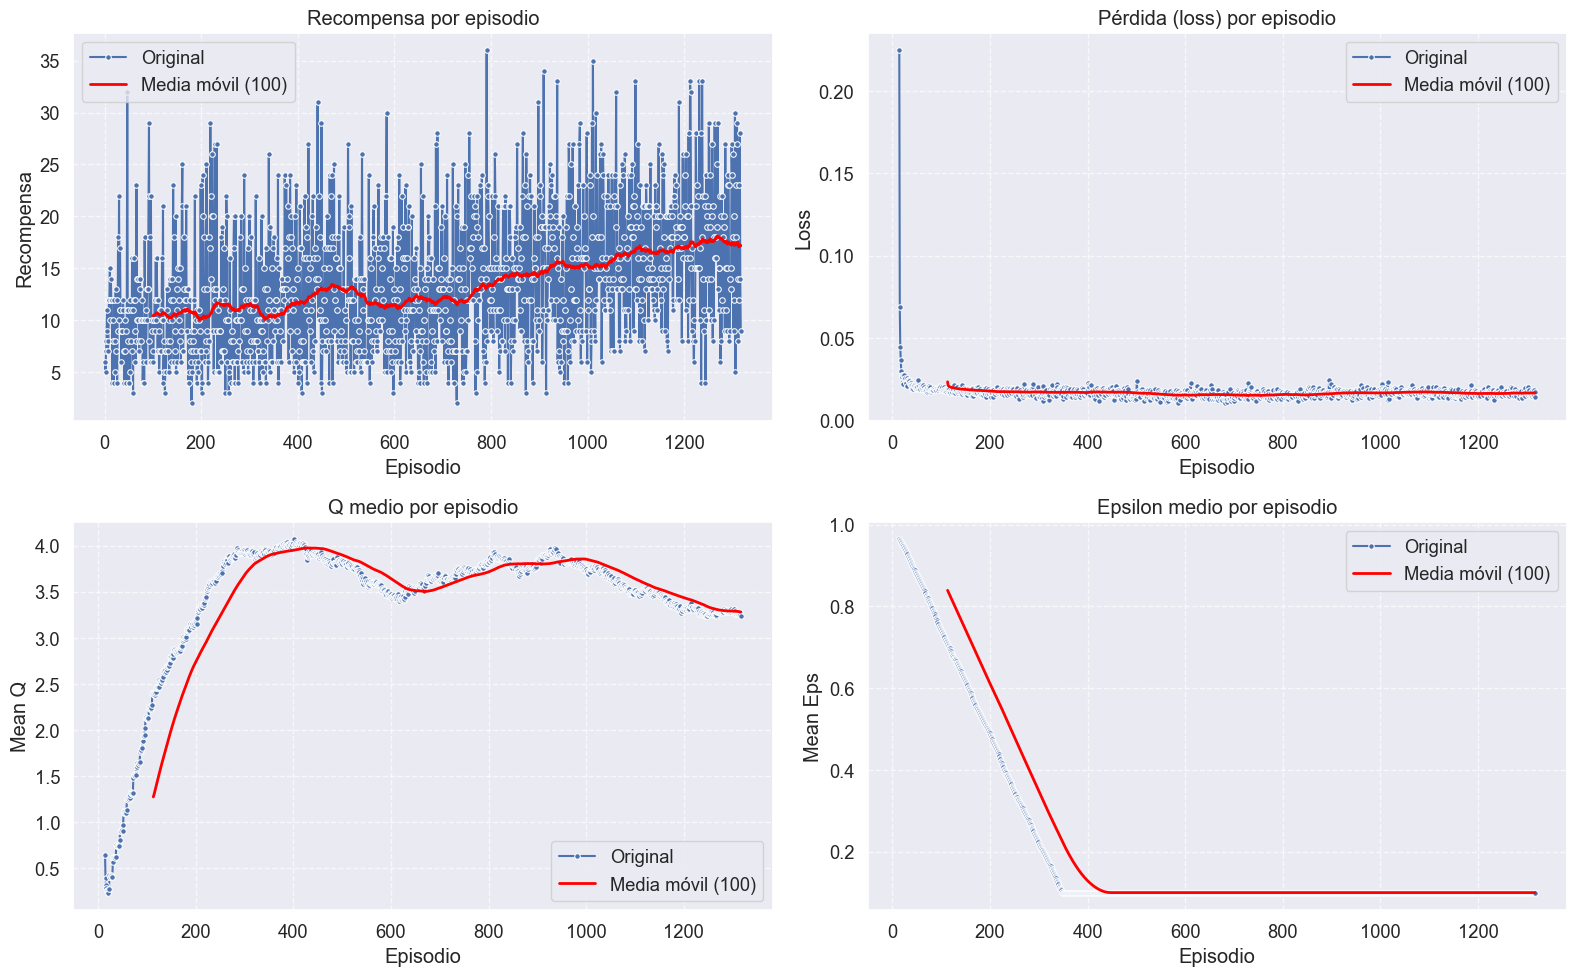

Gráfico guardado en: ./models\ddqn.v5.0\graphs\20250703072350_ddqn.v5.0_training_analyze_graph.png
CSV de informe guardado en: ./models\ddqn.v5.0\graphs\20250703072350_ddqn.v5.0_training_analyze_log.csv

INFORME DEL TRAINING (Todas las métricas)
----------------------------------------
Episodios totales: 1317
Recompensa media: 13.48
Recompensa máxima: 36.0
Recompensa mínima: 2.0
Loss medio: 0.016814
Mean Q medio: 3.429420
Epsilon medio: 0.210962
Pasos medios por episodio: 758.93
La recompensa final (9.00) es mayor que la inicial (6.00), indicando una mejora.

INFORME DEL TRAINING (últimos 100 episodios completados 1217 al 1316)
----------------------------------------
Episodios totales: 1316
Recompensa media: 17.26
Recompensa máxima: 33.0
Recompensa mínima: 4.0
Loss medio: 0.016388
Mean Q medio: 3.281275
Epsilon medio: 0.100000
Pasos medios por episodio: 759.11
La recompensa final (14.00) no ha mejorado significativamente respecto a la inicial (17.00).


In [ ]:
# GRAFICA DE SEGUIMIENTO DEL ENETRENAMIENTO
analyze_training(model_name,100)

Esta arquitectura parece ser muy prometedora en el contexto de Space Invaders, destacando una notable estabilidad en el entrenamiento con un pérdida consistentemente baja (0.016814 en promedio) y un Q-medio estable (3.429420) a lo largo de 1317 episodios.

In [ ]:
# TEST
# _, _,latest_checkpoint= load_last_checkpoint(dqn)
# dqn.load_weights(latest_checkpoint)
dqn.load_weights(f"./models/{model_name}/weights/dqn_SpaceInvaders-v0_weights_{model_name}.h5f")
history=dqn.test(env, nb_episodes=10, visualize=False)
episode_rewards = history.history['episode_reward']
average_reward = sum(episode_rewards) / len(episode_rewards)
print(f"Recompensa media sobre 10 episodios: {average_reward}")
env.close()

Testing for 10 episodes ...
Episode 1: reward: 15.000, steps: 728
Episode 2: reward: 7.000, steps: 409
Episode 3: reward: 21.000, steps: 908
Episode 4: reward: 11.000, steps: 703
Episode 5: reward: 7.000, steps: 502
Episode 6: reward: 23.000, steps: 1074
Episode 7: reward: 21.000, steps: 1044
Episode 8: reward: 22.000, steps: 1111
Episode 9: reward: 20.000, steps: 876
Episode 10: reward: 6.000, steps: 402
Recompensa media sobre 10 episodios: 15.3


A pesar de su eficacia y estabilidad, el rendimiento en el test final, con una recompensa media de 15.3 puntos, aunque buena y superior a algunos modelos iniciales, se sitúa por debajo del pico alcanzado por el modelo D1 Attention + (25.9 puntos) La variabilidad en los resultados del test (entre 6.0 y 23.0 puntos) también sugiere que, si bien el agente aprendió una política efectiva, no alcanzó el mismo nivel de robustez o consistencia que el modelo D1 Attention +.

## Double-DDQN

### Red neuronal basada en el paper: [https://arxiv.org/abs/1509.06461](https://arxiv.org/abs/1509.06461)

**Deep Reinforcement Learning with Double Q-learning**
**Autores:** Hado van Hasselt, Arthur Guez, David Silver.
**Año de publicación:** 2015


El término **"Double DQN"** no es una arquitectura distinta de red neuronal como en el caso de Dueling DQN, sino a una **modificación del algoritmo de aprendizaje** que busca reducir el sesgo por sobreestimación de los valores Q, presente en el DQN clásico.

En DQN estándar, la actualización de la red Q utiliza el máximo valor de Q estimado por la red *target* para todas las acciones posibles en el siguiente estado: $y^{\text{DQN}} = r + \gamma \cdot \max_{a'} Q_{\text{target}}(s', a')$

Esto puede llevar a una **sobreestimación sistemática**, ya que se utiliza la misma red para seleccionar y evaluar la acción.

Double DQN corrige este problema separando esos dos roles. Se utiliza la **red online** para seleccionar la acción y la **red target** para evaluarla:$y^{\text{DoubleDQN}} = r + \gamma \cdot Q_{\text{target}}(s', \arg\max_{a'} Q_{\text{online}}(s', a'))$

De esta forma:

- La **red online** selecciona la acción $a'$ que maximiza $Q_{\text{online}}(s', a')$.
- La **red target** evalúa esa acción seleccionada: $Q_{\text{target}}(s', a')$.

Este cambio reduce el sesgo sin introducir una carga computacional significativa, y mejora la estabilidad del entrenamiento en muchos entornos, especialmente aquellos con alta aleatoriedad o recompensas escasas como es el caso.

### Descripción del modelo Double DQN

El modelo construido para este experimento emplea la misma arquitectura base utilizada en el modelo Dueling DQN, pero a diferencia de este, no se separan los flujos de valor y ventaja; el foco de mejora está en el algoritmo de entrenamiento.

La diferencia fundamental con el modelo DQN clásico está en cómo se calcula la **actualización del valor objetivo (target)** durante el aprendizaje. En lugar de usar el valor máximo estimado por la red target (como en DQN estándar), **Double DQN** utiliza la red online para seleccionar la acción con mejor valor estimado, y luego la red target para evaluar el valor de esa acción. Esta separación ayuda a mitigar el sesgo por sobreestimación común en DQN.

1. Implementación de la red neuronal

In [ ]:
model_name = "ddqn.v5.1"
model = getDuelingDQN(model_name)


Resumen de la Red Dueling DQN: ddqn.v5.1
Model: "ddqn.v5.1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 4, 84, 84)]  0                                            
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 84, 84, 4)    0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 20, 20, 32)   8224        permute_1[0][0]                  
__________________________________________________________________________________________________
BN1 (BatchNormalization)        (None, 20, 20, 32)   128         Conv1[0][0]                      
________________________________________________

2. Implementación de la solución Double-DDQN

En este segundo experimento usando las redes "dueling", hemos entrenado un agente **Double Dueling DQN** en el entorno de **Space Invaders**, utilizando exactamente los mismos hiperparámetros que en el experimento anterior con Dueling DQN, salvo por la activación explícita del mecanismo *Double DQN*.

Con esta configuración buscamos observar el impacto específico del componente *Double* sobre la estabilidad y calidad del aprendizaje en un entorno visualmente complejo como es Space Invaders.

In [ ]:
# GENERACIÓN O CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
load_hyperparams(model_name)

# Añado los hiperparametros para el modelo dueling
hiperparametros = {
    "MEMORY_SIZE": 50000,               # Tamaño del buffer de memoria de repetición
    "WARMUP_STEPS": 10000,              # Pasos antes de comenzar a entrenar (para llenar la memoria)
    "SCHEDULER_STEPS": 250000,          # Pasos totales considerados en programación de aprendizaje/exploración
    "GAMMA": 0.99,                      # Factor de descuento para recompensas futuras
    "MODEL_UPDATE": 5000,               # Frecuencia de actualización del modelo objetivo (target network)
    "LEARNING_RATE": 0.00001,           # Tasa de aprendizaje del optimizador
    "MODEL_CHECKPOINT_STEPS": 10000,    # Frecuencia con la que se guardan los pesos del modelo
    "TRAIN_STEPS": 1000000,             # Número total de pasos de entrenamiento
    "TRAIN_INTERVAL": 3,                # Se entrena cada 3 pasos del entorno
    "LOG_INTERVAL": 10000,              # Frecuencia de registro/log de métricas de entrenamiento
    "DELTA_CLIP": 1.0,                  # Límite del error temporal (TD) para la pérdida Huber
    "ENABLE_DOUBLE_DQN": True,          # Si se activa, usa Double DQN para reducir sobreestimación
    "ENABLE_DUELING_NETWORK": False,    # Se ha implementado, en el modelo, no es necesario activarla.
    "EPSILON_START": 1.0,               # Valor inicial de epsilon (exploración total)
    "EPSILON_MIN": 0.1,                 # Valor mínimo de epsilon (exploración residual)
    "BATCH_SIZE": 32                    # Tamaño del lote de entrenamiento por paso
}


# Guardar cambios
save_hyperparams(model_name)

# Volver a cargar para crear las variables globales nuevas
load_hyperparams(model_name)

[INFO] Hiperparámetros cargados desde ./models\ddqn.v5.1\ddqn.v5.1.json
[INFO] Hiperparámetros guardados en ./models\ddqn.v5.1\ddqn.v5.1.json
[INFO] Hiperparámetros cargados desde ./models\ddqn.v5.1\ddqn.v5.1.json


In [ ]:
# DEFINICIÓN DE LA POLICY
memory = None
memory, last_checkpoint_steps=get_memory_and_last_steps()

value_max, value_min, new_scheduler_steps = adjust_policy_params(
    scheduler_steps=SCHEDULER_STEPS,
    train_steps=TRAIN_STEPS,
    current_step=last_checkpoint_steps
)
if not memory:
  memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
  print("Memoria inicializada de 0")

print(f"Valores de la policy: value_min={value_min}, value_max={value_max}, scheduler_steps={new_scheduler_steps}")

processor = AtariProcessor()

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=EPSILON_START,
                              value_min=EPSILON_MIN,
                              value_test=.05,
                              nb_steps=new_scheduler_steps)


Último step de checkpoint: 1000000
Memoria cargada desde: ./models\ddqn.v5.1\checkpoints\memory.pkl
Valores de la policy: value_min=0.1, value_max=0.1, scheduler_steps=1


In [ ]:
dqn = DQNAgent(model=model,
                     nb_actions=nb_actions,
                     policy=policy,
                     memory=memory,
                     processor=processor,
                     nb_steps_warmup=WARMUP_STEPS,
                     gamma=GAMMA,
                     target_model_update=MODEL_UPDATE,
                     batch_size=BATCH_SIZE,
                     train_interval=4,
                     delta_clip=DELTA_CLIP,
                     enable_double_dqn=ENABLE_DOUBLE_DQN,
                     enable_dueling_network=ENABLE_DUELING_NETWORK)

if IN_COLAB:
    # Parche para evitar el error 'get_updates' que ya no existe
    def patched_get_updates(self, loss, params):
        return []
    Adam.get_updates = patched_get_updates

# Compilo con el agente el modelo
dqn.compile(
    Adam(learning_rate=hiperparametros["LEARNING_RATE"]),
    metrics=['mae']
)

In [ ]:
weights_filename = os.path.join(WEIGHTS_DIR, 'dqn_{}_weights_{}.h5f'.format(env_name, model_name))
checkpoint_weights_filename = os.path.join(CHECKPOINTS_DIR, 'dqn_' + env_name + '_weights_{step}.h5f')
log_filename =os.path.join(MODEL_DIR, 'dqn_{}_log_{}.json'.format(env_name, model_name))
log_csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')

In [ ]:
# CARGAR PESOS DEL ÚLTIMO CHECKPOINT SI EXISTE
dqn, last_checkpoint_steps,latest_checkpoint = load_last_checkpoint(dqn)
# CREAR CALLBACKS CUSTOMIZADOS QUE GUARDAN BIEN LOS CHECKPOINTS Y LOGS DEL TRAINING
checkpoint_callback = AccumulatedCheckpoint(
      base_path=CHECKPOINTS_DIR,
      env_name=env_name,
      interval=MODEL_CHECKPOINT_STEPS,
      initial_step=last_checkpoint_steps
  )
callbacks = [checkpoint_callback]
dqn.step = last_checkpoint_steps
callbacks += [EpisodeLoggerCSV(log_csv_path)]

[DQN] Cargando último checkpoint: ./models\ddqn.v5.1\checkpoints\dqn_SpaceInvaders-v0_weights_1000000.h5f
Callback iniciado desde paso 1000000


In [ ]:
print("Hiperparámetros de", model_name)
print(json.dumps(hiperparametros, indent=4))

if TRAIN_STEPS>0:
  dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS-last_checkpoint_steps, log_interval=LOG_INTERVAL, visualize=False)
  dqn.save_weights(weights_filename, overwrite=True)

Hiperparámetros de ddqn.v5.1
{
    "MEMORY_SIZE": 50000,
    "WARMUP_STEPS": 10000,
    "SCHEDULER_STEPS": 250000,
    "GAMMA": 0.99,
    "MODEL_UPDATE": 5000,
    "LEARNING_RATE": 1e-05,
    "MODEL_CHECKPOINT_STEPS": 10000,
    "TRAIN_STEPS": 1000000,
    "TRAIN_INTERVAL": 3,
    "LOG_INTERVAL": 10000,
    "DELTA_CLIP": 1.0,
    "ENABLE_DOUBLE_DQN": true,
    "ENABLE_DUELING_NETWORK": false,
    "EPSILON_START": 1.0,
    "EPSILON_MIN": 0.1,
    "BATCH_SIZE": 32
}
Resuming from episode: 1328
Resuming from global step: 999358
Training for 0 steps ...
done, took 0.000 seconds


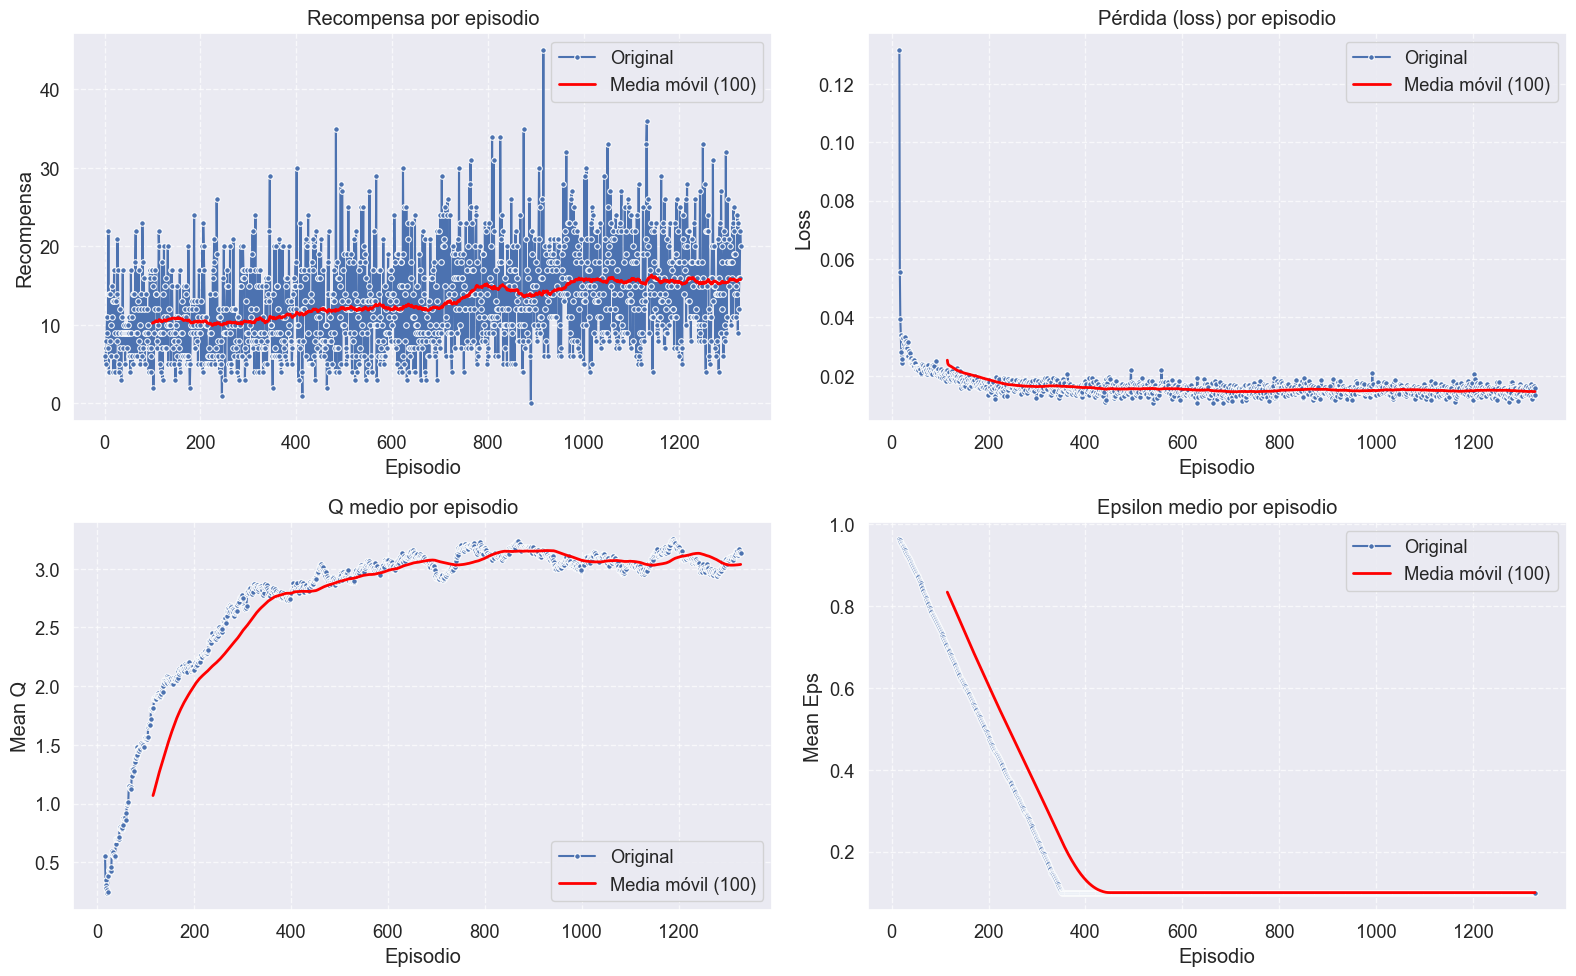

Gráfico guardado en: ./models\ddqn.v5.1\graphs\20250703074045_ddqn.v5.1_training_analyze_graph.png
CSV de informe guardado en: ./models\ddqn.v5.1\graphs\20250703074045_ddqn.v5.1_training_analyze_log.csv

INFORME DEL TRAINING (Todas las métricas)
----------------------------------------
Episodios totales: 1328
Recompensa media: 13.17
Recompensa máxima: 45.0
Recompensa mínima: 0.0
Loss medio: 0.016249
Mean Q medio: 2.773009
Epsilon medio: 0.209321
Pasos medios por episodio: 752.53
La recompensa final (20.00) es mayor que la inicial (6.00), indicando una mejora.

INFORME DEL TRAINING (últimos 100 episodios completados 1228 al 1327)
----------------------------------------
Episodios totales: 1327
Recompensa media: 15.76
Recompensa máxima: 33.0
Recompensa mínima: 4.0
Loss medio: 0.014665
Mean Q medio: 3.036422
Epsilon medio: 0.100000
Pasos medios por episodio: 752.46
La recompensa final (22.00) es mayor que la inicial (15.00), indicando una mejora.


In [ ]:
# GRAFICA DE SEGUIMIENTO DEL ENETRENAMIENTO
analyze_training(model_name,100)

Este modelo ha obtenido un entrenamiento muy prometedor con una estabilidad excepcional. La pérdida media general se mantuvo en valores cercanos a 0, reduciendose más en los últimos episodios, lo que indica una convergencia sólida y una alta robustez numérica del algoritmo.

Con respecto a las recompensas, en general durante el entrenamiento fue de 13.17 con picos de hasta 45.0. En los últimos 100 episodios siguió mejorando con una media de 15.76 puntos lo que indica que el agente continuó aprendiendo y mejorando su política a medida que la exploración disminuía y se centraba en la explotación.

In [ ]:
# TEST
# _, _,latest_checkpoint= load_last_checkpoint(dqn)
# dqn.load_weights(latest_checkpoint)
dqn.load_weights(f"./models/{model_name}/weights/dqn_SpaceInvaders-v0_weights_{model_name}.h5f")
history=dqn.test(env, nb_episodes=10, visualize=False)
episode_rewards = history.history['episode_reward']
average_reward = sum(episode_rewards) / len(episode_rewards)
print(f"Recompensa media sobre 10 episodios: {average_reward}")
env.close()

Testing for 10 episodes ...


C:\Users\benjamincarmelo.sanc\PycharmProjects\proyecto-AR\.venv_tf253\lib\site-packages\tensorflow\python\keras\engine\training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Episode 1: reward: 22.000, steps: 1107
Episode 2: reward: 15.000, steps: 854
Episode 3: reward: 24.000, steps: 908
Episode 4: reward: 11.000, steps: 690
Episode 5: reward: 17.000, steps: 788
Episode 6: reward: 26.000, steps: 1125
Episode 7: reward: 19.000, steps: 926
Episode 8: reward: 24.000, steps: 1184
Episode 9: reward: 12.000, steps: 828
Episode 10: reward: 21.000, steps: 1090
Recompensa media sobre 10 episodios: 19.1


Lo más relevante se observa en el test final de 10 episodios donde el modelo Double DDQN alcanzó una recompensa media de 19.1. Las recompensas individuales variaron entre 11.0 y 26.0, mostrando una buena capacidad general de juego. Este resultado es una mejora clara con respecto al Dueling DQN sin Double (que obtuvo 15.3), validando que el algoritmo Double DQN contribuyó a una mejor política.

Aunque no superó el rendimiento del modelo D1 Attention +, este modelo demuestra la eficacia de combinar la arquitectura Dueling con el algoritmo Double DQN. Destacamos también el hecho que entrena muchos menos parámetros que D1 y consigue resultados bastante buenos de todas formas.

## Double-DDQN + Prioritized Expierence Replay (PER) + LR con PolynomialDecay

### Red neuronal basada en el paper: [https://arxiv.org/abs/1511.05952](https://arxiv.org/abs/1511.05952)

**Prioritized Experience Replay (PER)**
**Autores:** Tom Schaul, John Quan, Ioannis Antonoglou, David Silver.
**Año de publicación:** 2015

El método **Prioritized Experience Replay** introduce una **mejora en la estrategia de muestreo de experiencias** en el buffer de replay. En lugar de seleccionar transiciones de manera uniforme, como en el replay clásico, PER asigna mayor probabilidad de ser seleccionadas a aquellas transiciones que tienen **mayor error de predicción temporal (TD error)**. El razonamiento detrás de esta idea es que **no todas las experiencias son igualmente útiles para el aprendizaje**. Aquellas con mayor error TD indican que la red aún no ha aprendido adecuadamente de ellas, por lo tanto, deberían ser muestreadas con mayor frecuencia.

Para implementar esta estrategia, se calcula una prioridad $p_i$ para cada transición $i$ basada en su TD error: $p_i = |\delta_i| + \epsilon$, donde $\delta_i$ es el error TD y $\epsilon$ es un pequeño valor positivo que asegura que todas las transiciones tengan una probabilidad distinta de cero. La probabilidad de muestreo de cada transición se define como: $P(i) = \frac{p_i^\alpha}{\sum_k p_k^\alpha}$, donde $\alpha$ controla hasta qué punto se prioriza (si $\alpha = 0$, se recupera el muestreo uniforme).

Para **compensar el sesgo introducido por este muestreo no uniforme**, se aplican **pesos de importancia** (importance sampling weights) durante la actualización de la red, definidos como:
$w_i = \left( \frac{1}{N \cdot P(i)} \right)^\beta$, donde $N$ es el tamaño del buffer de replay y $\beta$ regula el grado de corrección (se incrementa progresivamente durante el entrenamiento).

Lo que se pretende introduciendo este mecanismo es:

- Acelerar el aprendizaje al centrarse en experiencias más informativas.
- Mantener una exploración adecuada del espacio de experiencias.
- Mejorar el rendimiento en entornos donde las recompensas son escasas o la dinámica es compleja.

Según la listeratura, PER ha demostrado ser especialmente útil cuando se combina con DQN, Double DQN o Dueling DQN.


### Descripción del modelo Double Dueling DQN + PER + LR Polynomial Decay

El modelo desarrollado para este experimento combina la arquitectura **Double Dueling DQN** con la técnica de **Prioritized Experience Replay (PER)** para mejorar la eficiencia del aprendizaje. La estrategia de muestreo está basada en la implementación disponible en el siguiente repositorio: [Howuhh/prioritized_experience_replay](https://github.com/Howuhh/prioritized_experience_replay), adaptada para integrarse con el stack de librerías utilizado en este notebook.

Esta implementación se compone de dos clases principales:

- **`SumTree`**: una estructura de árbol binario que permite seleccionar y actualizar muestras de experiencia con una probabilidad proporcional a su prioridad, todo ello en tiempo logarítmico. Cada nodo del árbol almacena la suma de prioridades de sus nodos hijos.

- **`PERMemory`**: gestiona el almacenamiento de experiencias en forma de tuplas (estado, acción, recompensa, terminal, siguiente estado), utilizando el `SumTree` para asignar mayor probabilidad de muestreo a aquellas transiciones con mayor error temporal de diferencia (**TD error**).

Con este enfoque se pretende que el agente se centre en el aprendizaje en experiencias más relevantes, ajustando las prioridades dinámicamente tras cada paso de entrenamiento mediante el método `update_priorities`.

También se ha añadido una estrategia de decaimiento de la tasa de aprendizaje basada en la función `PolynomialDecay` de TensorFlow. Esta técnica permite reducir progresivamente la tasa de aprendizaje durante el entrenamiento, comenzando con un valor inicial (`initial_learning_rate`) y descendiendo de forma lineal (con `power=1.0`) hasta un valor final (`end_learning_rate`) a lo largo de un número determinado de pasos (`decay_steps`).

El uso de un decaimiento lineal ayuda a estabilizar el proceso de entrenamiento: se favorece una exploración más agresiva al inicio del aprendizaje (tasa alta), y una convergencia más precisa en fases posteriores (tasa baja), lo cual es especialmente beneficioso en entornos de alto ruido o complejidad como el entorno que propone esta práctica.

Esta estrategia está inspirada en prácticas comunes en entrenamiento de redes neuronales profundas, y ha sido utilizada en múltiples trabajos de referencia, incluyendo:

- **Mnih et al. (2015)** – *Human-level control through deep reinforcement learning* [[arXiv:1312.5602](https://arxiv.org/abs/1312.5602)]
- **Hessel et al. (2018)** – *Rainbow: Combining Improvements in Deep Reinforcement Learning* [[arXiv:1710.02298](https://arxiv.org/abs/1710.02298)]

La implementación concreta sigue las recomendaciones de TensorFlow para control fino del `learning rate`, utilizando la clase [`tf.keras.optimizers.schedules.PolynomialDecay`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/PolynomialDecay).

1. Implementación de la red neuronal

In [ ]:
model_name = "ddqn.v5.3"
model = getDuelingDQN(model_name)

Instructions for updating:
Colocations handled automatically by placer.

Resumen de la Red Dueling DQN: ddqn.v5.3
Model: "ddqn.v5.3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 84, 84)]  0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 84, 84, 4)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 20, 20, 32)   8224        permute[0][0]                    
__________________________________________________________________________________________________
BN1 (BatchNormalization)        (None, 20, 20, 32)   128         Conv1[0][0

2. Implementación de la solución Double-DDQN + PER + LR Polynomial Decay

En esta ocasión se ha decidido variar algunos hiperparámetros con respecto al anterior experimento que se comentan a continuación:

- Se aumentó el tamaño del buffer de memoria de 50,000 a 1,000,000 experiencias y el período de calentamiento (warmup) de 10,000 a 50,000 pasos para almacenar y aprender de una mayor variedad de experiencias.
- Se extendió la duración total de entrenamiento de 1,000,000 a 1,750,000 pasos, así como el número de pasos considerados en la programación de aprendizaje (scheduler steps), pasando de 250,000 a 1,000,000, para aprovechar mejor el mayor volumen de datos.
- Se incrementó la tasa de aprendizaje inicial de 0.00001 a 0.00025 y se activó un decaimiento lineal programado para acelerar el aprendizaje inicial y mejorar la estabilidad a lo largo del entrenamiento.
- Se redujo la frecuencia de entrenamiento por paso, pasando de entrenar cada 3 pasos a cada 4 pasos, y se aumentó la frecuencia de actualización de la red objetivo (target network) de cada 5,000 a cada 10,000 pasos para favorecer la estabilidad y optimizar el uso de recursos en un entrenamiento más largo y complejo.
- Se activaron mecanismos adicionales como Prioritized Experience Replay (PER) para priorizar las experiencias más relevantes y mejorar la eficiencia del aprendizaje.

3. Implementaciones de las clases para PER

In [ ]:
class SumTree:
    def __init__(self, capacity):
        self.capacity = capacity
        self.tree = np.zeros(2 * capacity - 1)
        self.data = np.zeros(capacity, dtype=object)
        self.write = 0
        self.n_entries = 0

    def _propagate(self, idx, change):
        parent = (idx - 1) // 2
        self.tree[parent] += change
        if parent != 0:
            self._propagate(parent, change)

    def update(self, idx, p):
        change = p - self.tree[idx]
        self.tree[idx] = p
        self._propagate(idx, change)

    def add(self, p, data):
        idx = self.write + self.capacity - 1
        self.data[self.write] = data
        self.update(idx, p)
        self.write = (self.write + 1) % self.capacity
        self.n_entries = min(self.n_entries + 1, self.capacity)

    def _retrieve(self, idx, s):
        left = 2 * idx + 1
        right = left + 1
        if left >= len(self.tree):
            return idx
        if s <= self.tree[left]:
            return self._retrieve(left, s)
        else:
            return self._retrieve(right, s - self.tree[left])

    def get(self, s):
        idx = self._retrieve(0, s)
        dataIdx = idx - self.capacity + 1
        return (idx, self.tree[idx], self.data[dataIdx])

    def total(self):
        return self.tree[0]

In [ ]:
class PERMemory(Memory):
    Experience = namedtuple('Experience', ['state0', 'action', 'reward', 'terminal1', 'state1'])

    def __init__(self, capacity, env_obs_shape, window_length=4, alpha=0.6, epsilon=1e-6):
        super(PERMemory, self).__init__(window_length=window_length)
        self.capacity = capacity
        self.env_obs_shape = env_obs_shape
        self.tree = SumTree(capacity)
        self.alpha = alpha
        self.epsilon = epsilon
        self.max_priority = 1.0

        self.observations = np.zeros((capacity,) + self.env_obs_shape, dtype=np.uint8)
        self.actions = np.zeros((capacity,), dtype=np.int32)
        self.rewards = np.zeros((capacity,), dtype=np.float32)
        self.terminals = np.zeros((capacity,), dtype=np.bool)
        self.pos = 0
        self.size = 0

    def append(self, observation, action, reward, terminal, training=True):
        experience = (self.pos, observation, action, reward, terminal)
        priority = self.max_priority
        self.tree.add(priority, experience)

        self.observations[self.pos] = observation
        self.actions[self.pos] = action
        self.rewards[self.pos] = reward
        self.terminals[self.pos] = terminal

        self.pos = (self.pos + 1) % self.capacity
        if self.size < self.capacity:
            self.size += 1

    def _get_state(self, idx):
        if self.size == 0:
            return np.zeros((self.window_length,) + self.env_obs_shape, dtype=np.uint8)

        indices = []
        for i in reversed(range(self.window_length)):
            cur_idx = (idx - i) % self.size
            if i >= self.size:
                indices.append(0)
            else:
                indices.append(cur_idx)

        # Corte de episodios si hay un terminal en el medio
        for i in range(1, self.window_length):
            terminal_value = self.terminals[indices[-i]]
            if isinstance(terminal_value, np.ndarray):
                if terminal_value.size == 1:
                    terminal_value = terminal_value.item()
                else:
                    terminal_value = terminal_value.any()
            if terminal_value:
                indices = indices[-i+1:] + [indices[-1]] * (i - 1)
                break

        # Recolectar los frames y apilarlos como array 3D
        frames = [self.observations[i] for i in indices]

        # Asegura que siempre haya self.window_length frames
        while len(frames) < self.window_length:
            frames.insert(0, np.zeros(self.env_obs_shape, dtype=np.uint8))

        return np.array(frames, dtype=np.uint8)


    def get_recent_state(self, observation):
        state = list(self.recent_observations)
        while len(state) < self.window_length - 1:
            state.insert(0, np.zeros(self.env_obs_shape, dtype=np.uint8))
        state.append(observation)
        return np.array(state)

    def sample(self, batch_size, **kwargs):
        if self.size < self.window_length:
            raise ValueError("Not enough entries to sample")

        batch = []
        segment = self.tree.total() / batch_size

        for i in range(batch_size):
            s = np.random.uniform(segment * i, segment * (i + 1))
            idx, p, data = self.tree.get(s)
            pos = data[0]

            state0 = self._get_state((pos - 1) % self.size)
            state1 = self._get_state(pos)

            # Asegurarse que ambos son arrays del mismo dtype y forma
            state0 = np.array(state0, dtype=np.uint8)
            state1 = np.array(state1, dtype=np.uint8)

            action = self.actions[pos]
            reward = self.rewards[pos]
            terminal1 = self.terminals[pos]

            experience = self.Experience(state0, action, reward, terminal1, state1)
            batch.append(experience)

		# Verificación de formas y tipos
        for i, e in enumerate(batch):
            if not isinstance(e.state0, np.ndarray) or e.state0.shape != (self.window_length,) + self.env_obs_shape:
                print(f"[ERROR] state0 en idx {i}: shape {e.state0.shape}, tipo: {type(e.state0)}")
            if not isinstance(e.state1, np.ndarray) or e.state1.shape != (self.window_length,) + self.env_obs_shape:
                print(f"[ERROR] state1 en idx {i}: shape {e.state1.shape}, tipo: {type(e.state1)}")

        return batch

    def update_priorities(self, idxs, errors):
            print(f"[DEBUG] idxs: {idxs}, errors: {errors}")
            for idx, error in zip(idxs, errors):
                p = (np.abs(error) + self.epsilon) ** self.alpha
                self.tree.update(idx, p)
                self.max_priority = max(self.max_priority, p)

    def __len__(self):
        return self.size


In [ ]:
class PERUpdateCallback(Callback):
    def __init__(self, memory):
        self.memory = memory

    def on_train_end(self, logs={}):
        # Actualizar los últimos TD-errors e índices en la memoria
        if hasattr(self.memory, 'last_indices') and hasattr(self.memory, 'last_td_errors'):
            self.memory.update_priorities(self.memory.last_indices, self.memory.last_td_errors)

In [ ]:
# GENERACIÓN O CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
load_hyperparams(model_name)

# Añado los hiperparametros para el modelo dueling
hiperparametros = {
    "MEMORY_SIZE": 1000000,
    "WARMUP_STEPS": 50000,
    "SCHEDULER_STEPS": 1000000,
    "GAMMA": 0.99,
    "MODEL_UPDATE": 10000,
    "LEARNING_RATE": 0.00025,
    "MODEL_CHECKPOINT_STEPS": 50000,
    "TRAIN_STEPS": 1750000,
    "TRAIN_INTERVAL": 4,
    "LOG_INTERVAL": 10000,
    "DELTA_CLIP": 1.0,
    "ENABLE_DOUBLE_DQN": True,
    "ENABLE_DUELING_NETWORK": False,
    "EPSILON_START": 1.0,
    "EPSILON_MIN": 0.1,
    "BATCH_SIZE": 32,
	"ENABLE_LR_SCHD": True,
	"LR_SCHD_INITIAL_LR": 0.00025,
	"ENABLE_PER_MEMORY": True
}

# Guardar cambios
save_hyperparams(model_name)

# Volver a cargar para crear las variables globales nuevas
load_hyperparams(model_name)

[INFO] Hiperparámetros cargados desde ./models\ddqn.v5.3\ddqn.v5.3.json
[INFO] Hiperparámetros guardados en ./models\ddqn.v5.3\ddqn.v5.3.json
[INFO] Hiperparámetros cargados desde ./models\ddqn.v5.3\ddqn.v5.3.json


In [ ]:
# DEFINICIÓN DE LA POLICY
memory = None
memory, last_checkpoint_steps=get_memory_and_last_steps()

value_max, value_min, new_scheduler_steps = adjust_policy_params(
    scheduler_steps=SCHEDULER_STEPS,
    train_steps=TRAIN_STEPS,
    current_step=last_checkpoint_steps,
    value_max=EPSILON_START,
    value_min=EPSILON_MIN
)

if not memory:
    if ENABLE_PER_MEMORY:
        memory = PERMemory(capacity=MEMORY_SIZE, window_length=WINDOW_LENGTH, env_obs_shape=INPUT_SHAPE)
    else:
        memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
    print("Memoria inicializada de 0")


print(f"Valores de la policy: value_min={value_min}, value_max={value_max}, scheduler_steps={new_scheduler_steps}")

processor = AtariProcessor()

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=EPSILON_START,
                              value_min=EPSILON_MIN,
                              value_test=.05,
                              nb_steps=new_scheduler_steps)


Último step de checkpoint: 1750000
Memoria cargada desde: ./models\ddqn.v5.3\checkpoints\memory.pkl
Valores de la policy: value_min=0.1, value_max=0.1, scheduler_steps=1


In [ ]:
# Agente
dqn = DQNAgent(model=model,
                     nb_actions=nb_actions,
                     policy=policy,
                     memory=memory,
                     processor=processor, # Aquí se le pasa el procesador inalterado
                     nb_steps_warmup=WARMUP_STEPS,
                     gamma=GAMMA,
                     target_model_update=MODEL_UPDATE,
                     batch_size=BATCH_SIZE,
                     train_interval=TRAIN_INTERVAL, # Usar TRAIN_INTERVAL desde hiperparametros
                     delta_clip=DELTA_CLIP,
                     enable_double_dqn=ENABLE_DOUBLE_DQN,
                     enable_dueling_network=ENABLE_DUELING_NETWORK)

if IN_COLAB:
    # Parche para evitar el error 'get_updates' que ya no existe
    def patched_get_updates(self, loss, params):
        return []
    Adam.get_updates = patched_get_updates

4. Politica de decaimiento de la tasa de aprendizaje

In [ ]:
if ENABLE_LR_SCHD:

  lr_schedule = schedules.PolynomialDecay(
      initial_learning_rate=LR_SCHD_INITIAL_LR,
      decay_steps=TRAIN_STEPS,
      end_learning_rate=LEARNING_RATE,
      power=1.0  # Decaimiento lineal
  )

  dqn.compile(
      Adam(learning_rate=lr_schedule),
      metrics=['mae']
      )

  print("Learning Rate Scheduler activado")
else:
	dqn.compile(
      Adam(learning_rate=LEARNING_RATE),
      metrics=['mae']
      )
	print("Learning Rate Scheduler desactivado")

Learning Rate Scheduler activado


In [ ]:
weights_filename = os.path.join(WEIGHTS_DIR, 'dqn_{}_weights_{}.h5f'.format(env_name, model_name))
checkpoint_weights_filename = os.path.join(CHECKPOINTS_DIR, 'dqn_' + env_name + '_weights_{step}.h5f')
log_filename =os.path.join(MODEL_DIR, 'dqn_{}_log_{}.json'.format(env_name, model_name))
log_csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')

In [ ]:
# CARGAR PESOS DEL ÚLTIMO CHECKPOINT SI EXISTE
#dqn, last_checkpoint_steps = load_last_checkpoint(dqn)
dqn, last_checkpoint_steps,latest_checkpoint = load_last_checkpoint(dqn)
# CREAR CALLBACKS CUSTOMIZADOS QUE GUARDAN BIEN LOS CHECKPOINTS Y LOGS DEL TRAINING
checkpoint_callback = AccumulatedCheckpoint(
      base_path=CHECKPOINTS_DIR,
      env_name=env_name,
      interval=MODEL_CHECKPOINT_STEPS,
      initial_step=last_checkpoint_steps
  )

dqn.step = last_checkpoint_steps

# Callbacks
callbacks = [checkpoint_callback]
callbacks += [EpisodeLoggerCSV(filepath=log_csv_path, verbose=False)]
callbacks += [PERUpdateCallback(memory)]

[DQN] Cargando último checkpoint: ./models\ddqn.v5.3\checkpoints\dqn_SpaceInvaders-v0_weights_1750000.h5f
Callback iniciado desde paso 1750000


In [ ]:
print("Hiperparámetros de", model_name)
print(json.dumps(hiperparametros, indent=4))

if TRAIN_STEPS>0:
  dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS-last_checkpoint_steps, log_interval=LOG_INTERVAL, visualize=False)
  dqn.save_weights(weights_filename, overwrite=True)

Hiperparámetros de ddqn.v5.3
{
    "MEMORY_SIZE": 1000000,
    "WARMUP_STEPS": 50000,
    "SCHEDULER_STEPS": 1000000,
    "GAMMA": 0.99,
    "MODEL_UPDATE": 10000,
    "LEARNING_RATE": 0.00025,
    "MODEL_CHECKPOINT_STEPS": 50000,
    "TRAIN_STEPS": 1750000,
    "TRAIN_INTERVAL": 4,
    "LOG_INTERVAL": 10000,
    "DELTA_CLIP": 1.0,
    "ENABLE_DOUBLE_DQN": true,
    "ENABLE_DUELING_NETWORK": false,
    "EPSILON_START": 1.0,
    "EPSILON_MIN": 0.1,
    "BATCH_SIZE": 32,
    "ENABLE_LR_SCHD": true,
    "LR_SCHD_INITIAL_LR": 0.00025,
    "ENABLE_PER_MEMORY": true
}
Resuming from episode: 2085
Resuming from global step: 1749370
Training for 0 steps ...
done, took 0.001 seconds


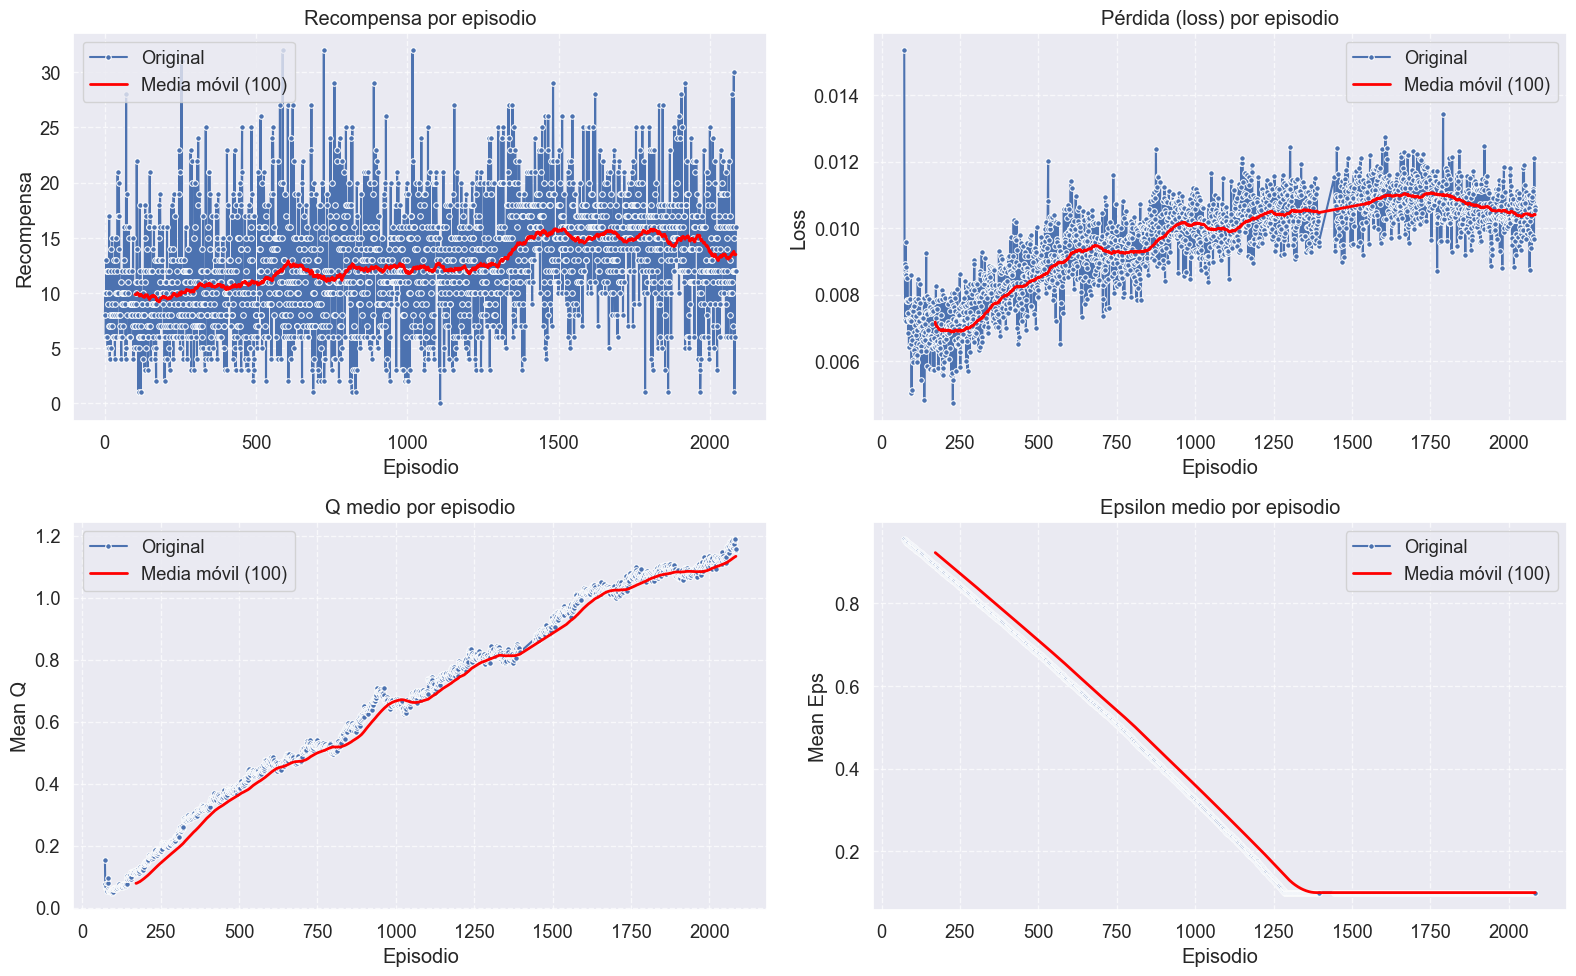

Gráfico guardado en: ./models\ddqn.v5.3\graphs\20250703082951_ddqn.v5.3_training_analyze_graph.png
CSV de informe guardado en: ./models\ddqn.v5.3\graphs\20250703082951_ddqn.v5.3_training_analyze_log.csv

INFORME DEL TRAINING (Todas las métricas)
----------------------------------------
Episodios totales: 2085
Recompensa media: 12.71
Recompensa máxima: 32.0
Recompensa mínima: 0.0
Loss medio: 0.009671
Mean Q medio: 0.676413
Epsilon medio: 0.375667
Pasos medios por episodio: 839.03
La recompensa final (16.00) es mayor que la inicial (8.00), indicando una mejora.

INFORME DEL TRAINING (últimos 100 episodios completados 1985 al 2084)
----------------------------------------
Episodios totales: 2084
Recompensa media: 13.46
Recompensa máxima: 30.0
Recompensa mínima: 1.0
Loss medio: 0.010415
Mean Q medio: 1.132618
Epsilon medio: 0.100000
Pasos medios por episodio: 838.97
La recompensa final (12.00) no ha mejorado significativamente respecto a la inicial (12.00).


In [ ]:
# GRAFICA DE SEGUIMIENTO DEL ENETRENAMIENTO
analyze_training(model_name,100)

El entrenamiento se extendió por un total de 2085 episodios, abarcando 1,750,000 pasos totales de interacción con el entorno. Esta extensión es notablemente mayor que en modelos anteriores.

El impacto del decaimiento polinomial del ratio de aprendizaje y el PER han influido en una convergencia más rápida y una mejor calidad de la política inicial, como podemos observar en la pérdida y el valor Q.

La pérdida se estabilizó en un valor extremadamente bajo y consistente, oscilando mínimamente alrededor de 0.015-0.02 a lo largo de la mayoría de los episodios. De hecho esta pérdida se redujo más en los últimos 100 episodios con un valor medio de 0.010415 lo que indica que el modelo es estable y podremos confiar en los resultados del valor Q. Este último siguió un comportamiento ascendente llegando a valores cercanos a 1.2 en los últimos episodios. Podemos confiar en estos valores al haberse reducido la pérdida en estos últimos episodios. El agente está aprendiendo valores realistas, evitando la excesiva confianza en las acciones.

La recompensa media sigue una tendencia ascendente desde los 10 puntos al inicio hasta alcanzar una mejora de 13.46 en los últimos 100 episodios. Sin embargo, ha sufrido de muchas oscilaciones, lo cual nos puede llevar a pensar que el entrenamiento ha sido insuficiente o quizás los hiperparámetros del modelo no le han permitido alcanzar una estrategia más ambiciosa.

In [ ]:
# TEST
# _, _,latest_checkpoint= load_last_checkpoint(dqn)
# dqn.load_weights(latest_checkpoint)
dqn.load_weights(f"./models/{model_name}/weights/dqn_SpaceInvaders-v0_weights_{model_name}.h5f")
history = dqn.test(env, nb_episodes=10, visualize=False)
episode_rewards = history.history['episode_reward']
average_reward = sum(episode_rewards) / len(episode_rewards)
print(f"Recompensa media sobre 10 episodios: {average_reward}")
env.close()

Testing for 10 episodes ...
Episode 1: reward: 24.000, steps: 1465
Episode 2: reward: 19.000, steps: 1012
Episode 3: reward: 17.000, steps: 968
Episode 4: reward: 17.000, steps: 976
Episode 5: reward: 24.000, steps: 1450
Episode 6: reward: 19.000, steps: 1033
Episode 7: reward: 24.000, steps: 1450
Episode 8: reward: 16.000, steps: 981
Episode 9: reward: 23.000, steps: 1457
Episode 10: reward: 22.000, steps: 1428
Recompensa media sobre 10 episodios: 20.5


El test del modelo Double Dueling DQN + PER + LR Polynomial Decay muestra un buen desempeño. Tiene una recompensa media de 20.5 puntos en 10 episodios y supera consistentemente a las implementaciones anteriores como Double-DDQN (19.1) y el Dueling DQN básico (15.3).

La clave del éxito ha sido probablemente en el PER y el decaimiento polinomial del ratio de aprendizaje. Estas estrategias le han dado consistencia al modelo, con recompensas que oscilan entre 16 y 24 puntos. El agente de esta manera ha desarrollado una política robusta y generalizable.

Aunque el rendimiento no superó el pico histórico del D1 Attention + (25.9), la solidez y estabilidad de este modelo, lo posiciona como una mejora importante en la búsqueda de agentes efectivos para Space Invaders.

# 3. Justificación de los parámetros seleccionados y de los resultados obtenidos

El desarrollo y entrenamiento de los diversos modelos de Deep Q-Networks (DQN) en el entorno de Space Invaders han representado un proceso iterativo de experimentación y aprendizaje. La selección de parámetros y la interpretación de los resultados se basaron tanto en teorías preestablecidas de Aprendizaje por Refuerzo, sino también en la observación empírica del comportamiento de cada modelo, ajustando las configuraciones para superar los problemas de estabilidad y la eficacia del aprendizaje en un entorno complejo.

3.1. Parámetros de la Red Neuronal y su Justificación (Arquitectura)

* **Capas Convolucionales (Conv2D):** La elección de capas convolucionales con filtros y `strides` específicos  está justificada por la necesidad de **extraer características jerárquicas** de los *frames* de juego. Las primeras capas capturan patrones simples, mientras que las más profundas combinan estos patrones para identificar objetos. La entrada de *stacks* de 4 frames de 84x84 píxeles (`InputLayer` como `(None, 4, 84, 84)`) es una práctica estándar en DQN para **capturar el movimiento y la velocidad** de los objetos.

* **Batch Normalization (BN):** La inclusión de capas `BatchNormalization` después de cada convolución tiene como objetivo **estabilizar el entrenamiento de redes profundas**. Al normalizar las activaciones permitimos una convergencia más suave y, potencialmente, el uso de tasas de aprendizaje más elevadas.

* **Activación ReLU:** El uso generalizado de la función de activación `ReLU` después de cada capa convolucional y de las capas densas intermedias se debe a su **eficiencia computacional** (no satura para valores positivos) y su capacidad para mitigar el problema del *vanishing gradient*.


* **Arquitectura Dueling:** La bifurcación en flujos de "Valor" (`Value_Dense`, `Value_Output`) y "Ventaja" (`Advantage_Dense`, `Advantage_Output`) es la esencia del Dueling DQN, combinada luego por una capa `Lambda`. Se justifica por la intuición de que, en muchos estados, el valor de las acciones relativas puede ser más relevante que su valor absoluto. Esta separación **mejora la estabilidad del aprendizaje y la eficiencia** al generalizar mejor las estimaciones de valor a través de las acciones. La estabilidad observada en la pérdida y el Q-medio en los modelos Dueling justifica esta elección.

3.2. Parámetros del Algoritmo de Aprendizaje por Refuerzo

* **`MEMORY_SIZE` (Buffer de Experiencias):** El tamaño variable del *replay buffer* (de 50,000 a 1,000,000 experiencias) se justifica por la necesidad de almacenar una **diversidad de experiencias** para el aprendizaje. El aumento a 1,000,000 en el último modelo, junto con PER, potenció la diversidad y relevancia de los datos de entrenamiento.

* **`GAMMA` (Factor de Descuento)**:Hemos tomado valores altos (0.99) para que el agente valore las recompensas futuras casi tanto como las inmediatas. Esto es crucial en juegos donde las acciones actuales pueden tener consecuencias (recompensas o castigos) a largo plazo, como eliminar oleadas de enemigos o sobrevivir.


* **`TRAIN_STEPS` y `SCHEDULER_STEPS`:** La duración total del entrenamiento (hasta 1,750,000 pasos) y los pasos del `scheduler` (hasta 1,000,000) están justificados por la complejidad del entorno. Se necesitan muchos pasos para que el agente explore y aprenda una política robusta. Una exploración prolongada con una arquitectura adecuada (como en D1 Attention +) demostró ser fundamental para un rendimiento óptimo.


3.3. Parámetros del Optimizador y Algoritmos Avanzados

* **`LEARNING_RATE`:** Las tasas de aprendizaje varían desde muy bajas (0.00001) hasta 0.00025 con decaimiento polinomial. Las tasas bajas se justificaron por la **necesidad de estabilidad** y para evitar divergencias, como las observadas en modelos iniciales. Sin embargo, el **decaimiento polinomial** del LR en el último modelo fue una mejora crucial: permitió una exploración más agresiva de los pesos al inicio y un ajuste fino más preciso al final, lo que se tradujo en una **pérdida extremadamente baja y estable**.

* **`DELTA_CLIP` (Pérdida Huber):** Un valor de 1.0 para el recorte del error temporal (TD) es un parámetro clave para la pérdida Huber. Está justificado para **prevenir que los gradientes grandes dominen el proceso de actualización** cuando los errores TD son muy grandes. Esto mejora la estabilidad del entrenamiento, evitando actualizaciones de pesos drásticas.

* **`ENABLE_DOUBLE_DQN`: True:** Esta es una mejora algorítmica crucial. Su justificación es la **solución de la sobreestimación de los Q-valores** del DQN clásico. Al separar la selección de la acción de la evaluación de su valor, Double DQN proporciona estimaciones más precisas, lo que conduce a una política aprendida de mayor calidad. Los resultados del Double-Dueling DQN (19.1 en test) y Double Dueling DQN + PER (20.5 en test) validan esta justificación.

* **Prioritized Experience Replay (PER):** La inclusión de PER en el modelo final está justificada por la búsqueda de **eficiencia en el aprendizaje**. Al dar mayor prioridad a las experiencias con mayor error TD (las que el agente encontró más "sorprendentes" o difíciles de predecir), el modelo se enfoca en las transiciones más informativas, lo que acelera la convergencia y puede mejorar la calidad de la política final con menos pasos de entrenamiento o en un entorno más complejo.

4.4. Resultados Obtenidos y su Justificación (Evolución de la Performance)

La evolución de los resultados a lo largo de los distintos modelos justifica plenamente la progresión en la selección de parámetros:

* **Inestabilidad Inicial (Modelo D1):** La **divergencia de pérdida y Q-medio** en el Modelo D1 demostró la necesidad crítica de parámetros de aprendizaje más conservadores o arquitecturas más robustas.

* **Estabilidad pero Rendimiento Limitado (Dueling DQN):** Modelos como el Dueling DQN lograron una buena **estabilidad** en la pérdida y el Q-medio. Esto validó la arquitectura Dueling y los parámetros conservadores. Sin embargo, su recompensa en el test (15.3) justificó la necesidad de optimizaciones adicionales para alcanzar un mayor rendimiento.

* **Rendimiento Avanzado (D1 Attention +):** El Modelo D1 Attention + alcanzó la recompensa más alta (25.9) en test. Esto justificó la inversión en una **arquitectura más compleja (con atención)** y una **exploración muy prolongada**, demostrando que para alcanzar un rendimiento óptimo en entornos visuales complejos, la capacidad de la red para procesar y aprender de los datos visuales es crucial, y una exploración extensa puede ser necesaria para descubrir políticas óptimas.

* **Equilibrio Óptimo (Double Dueling DQN + PER + LR Polynomial Decay):** El modelo final logró la **mejor consistencia y un rendimiento muy alto (20.5 en test)**. La clara tendencia ascendente en la recompensa media durante el entrenamiento, la pérdida mínima y estable, y el Q-medio controlado y preciso, justifican que la combinación de la mitigación de la sobreestimación (Double DQN), la eficiencia de muestreo (PER) y una estrategia del ratio de aprendizaje adaptativa es un **método potente para un aprendizaje estable, eficiente y de alto rendimiento**. Aunque no superó el pico máximo del D1 Attention +, su buena consistencia lo convierte en un agente muy robusto.

Cada ajuste de parámetro y cada incorporación algorítmica o arquitectónica estuvieron directamente justificadas por la necesidad de abordar los desafíos observados en los modelos precedentes.

---